<a href="https://colab.research.google.com/github/hivischi/Myocardial_Infarction/blob/main/Myocardial_infarction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-plot

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import plotly.express as px
import keras
import scikitplot as skplt
import xgboost
import imblearn

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

In [ ]:
from google.colab import files
dataset = files.upload()

Saving Myocardial infarction complications Database.csv to Myocardial infarction complications Database.csv


In [ ]:
dataset = pd.read_csv("Myocardial infarction complications Database.csv"); dataset

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_KBRIG,D_AD_KBRIG,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,...,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,KFK_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,180.0,100.0,0.0,0.0,...,0.0,138.0,NaN,NaN,NaN,8.0,16.0,4.0,0.0,0.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,120.0,90.0,0.0,0.0,...,0.0,132.0,0.38,0.18,NaN,7.8,3.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,100.0,180.0,100.0,0.0,0.0,...,0.0,132.0,0.30,0.11,NaN,10.8,NaN,3.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,120.0,70.0,0.0,0.0,...,0.0,146.0,0.75,0.37,NaN,NaN,NaN,2.0,0.0,0.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190.0,100.0,160.0,90.0,0.0,0.0,...,0.0,132.0,0.45,0.22,NaN,8.3,NaN,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1696,77.0,0,0.0,4.0,2.0,1.0,NaN,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,110.0,70.0,0.0,0.0,...,0.0,130.0,1.05,0.52,NaN,12.8,6.0,2.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,1,0,0,0,0,3
1696,1697,70.0,0,0.0,6.0,2.0,1.0,NaN,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,50.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN,1.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1
1697,1698,55.0,1,3.0,6.0,2.0,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,70.0,50.0,0.0,NaN,...,NaN,NaN,0.23,0.15,NaN,8.3,13.0,1.0,2.0,0.0,0.0,NaN,NaN,NaN,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,6
1698,1699,79.0,0,2.0,2.0,2.0,1.0,NaN,2.0,0.0,7.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,110.0,70.0,0.0,0.0,...,0.0,136.0,0.45,0.45,NaN,7.5,4.0,2.0,1.0,NaN,NaN,1.0,0.0,1.0,1.0,2.0,NaN,NaN,1.0,NaN,NaN,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,1


#Pre Processing

ID 0%
AGE 0%
SEX 0%
INF_ANAM 0%
STENOK_AN 6%
FK_STENOK 4%
IBS_POST 3%
IBS_NASL 96%
GB 1%
SIM_GIPERT 0%
DLIT_AG 15%
ZSN_A 3%
nr_11 1%
nr_01 1%
nr_02 1%
nr_03 1%
nr_04 1%
nr_07 1%
nr_08 1%
np_01 1%
np_04 1%
np_05 1%
np_07 1%
np_08 1%
np_09 1%
np_10 1%
endocr_01 1%
endocr_02 1%
endocr_03 1%
zab_leg_01 0%
zab_leg_02 0%
zab_leg_03 0%
zab_leg_04 0%
zab_leg_06 0%
S_AD_KBRIG 63%
D_AD_KBRIG 63%
S_AD_ORIT 16%
D_AD_ORIT 16%
O_L_POST 1%
K_SH_POST 1%
MP_TP_POST 1%
SVT_POST 1%
GT_POST 1%
FIB_G_POST 1%
ant_im 5%
lat_im 5%
inf_im 5%
post_im 4%
IM_PG_P 0%
ritm_ecg_p_01 9%
ritm_ecg_p_02 9%
ritm_ecg_p_04 9%
ritm_ecg_p_06 9%
ritm_ecg_p_07 9%
ritm_ecg_p_08 9%
n_r_ecg_p_01 7%
n_r_ecg_p_02 7%
n_r_ecg_p_03 7%
n_r_ecg_p_04 7%
n_r_ecg_p_05 7%
n_r_ecg_p_06 7%
n_r_ecg_p_08 7%
n_r_ecg_p_09 7%
n_r_ecg_p_10 7%
n_p_ecg_p_01 7%
n_p_ecg_p_03 7%
n_p_ecg_p_04 7%
n_p_ecg_p_05 7%
n_p_ecg_p_06 7%
n_p_ecg_p_07 7%
n_p_ecg_p_08 7%
n_p_ecg_p_09 7%
n_p_ecg_p_10 7%
n_p_ecg_p_11 7%
n_p_ecg_p_12 7%
fibr_ter_01 1%
fibr_ter_02 1%
fib

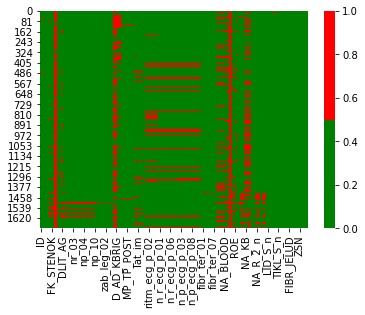

In [ ]:
dataset.isnull().sum()

col=dataset.columns
colors=['green','red']
sns.heatmap(dataset[col].isnull(),cmap=sns.color_palette(colors))

for col in dataset.columns:
  pct_missing=np.mean(dataset[col].isnull())
  print('{} {}%'.format(col,round(pct_missing*100)))

In [ ]:
dataset=dataset.drop(['IBS_NASL','KFK_BLOOD','NOT_NA_KB','S_AD_KBRIG','D_AD_KBRIG','LID_KB', 'NA_KB'],axis=1)

In [ ]:
missing_row=dataset.isnull().sum(axis=1)
miss_counts = missing_row.value_counts(); miss_counts


0     544
2     222
1     187
4     159
6     113
3      79
8      58
5      47
7      39
26     30
10     26
9      24
27     19
28     18
30     14
31     13
14     12
12     12
11     10
13     10
15      8
29      7
32      7
16      6
22      4
34      4
18      3
17      3
33      3
21      3
36      2
19      2
41      2
25      2
55      1
47      1
24      1
35      1
37      1
38      1
44      1
20      1
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



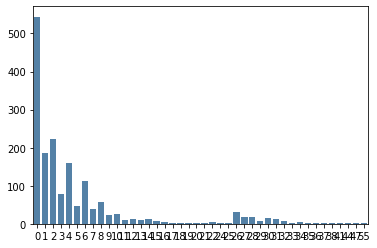

In [ ]:
sns.barplot(miss_counts.index, miss_counts.values, color= "steelblue")

In [ ]:
dataset=dataset.dropna(axis=0,thresh=112)
dataset = dataset.reset_index(drop=True)

In [ ]:
col=dataset.columns
for col in dataset.columns:
  missing= dataset[col].isnull().sum()
  print('{} {}'.format(col, missing))

ID 0
AGE 6
SEX 0
INF_ANAM 1
STENOK_AN 51
FK_STENOK 26
IBS_POST 17
GB 1
SIM_GIPERT 1
DLIT_AG 159
ZSN_A 19
nr_11 0
nr_01 0
nr_02 0
nr_03 0
nr_04 0
nr_07 0
nr_08 0
np_01 0
np_04 0
np_05 0
np_07 0
np_08 0
np_09 0
np_10 0
endocr_01 3
endocr_02 3
endocr_03 3
zab_leg_01 1
zab_leg_02 1
zab_leg_03 1
zab_leg_04 1
zab_leg_06 1
S_AD_ORIT 169
D_AD_ORIT 169
O_L_POST 0
K_SH_POST 1
MP_TP_POST 0
SVT_POST 0
GT_POST 0
FIB_G_POST 0
ant_im 22
lat_im 20
inf_im 22
post_im 20
IM_PG_P 1
ritm_ecg_p_01 0
ritm_ecg_p_02 0
ritm_ecg_p_04 0
ritm_ecg_p_06 0
ritm_ecg_p_07 0
ritm_ecg_p_08 0
n_r_ecg_p_01 0
n_r_ecg_p_02 0
n_r_ecg_p_03 0
n_r_ecg_p_04 0
n_r_ecg_p_05 0
n_r_ecg_p_06 0
n_r_ecg_p_08 0
n_r_ecg_p_09 0
n_r_ecg_p_10 0
n_p_ecg_p_01 0
n_p_ecg_p_03 0
n_p_ecg_p_04 0
n_p_ecg_p_05 0
n_p_ecg_p_06 0
n_p_ecg_p_07 0
n_p_ecg_p_08 0
n_p_ecg_p_09 0
n_p_ecg_p_10 0
n_p_ecg_p_11 0
n_p_ecg_p_12 0
fibr_ter_01 0
fibr_ter_02 0
fibr_ter_03 0
fibr_ter_05 0
fibr_ter_06 0
fibr_ter_07 0
fibr_ter_08 0
GIPO_K 134
K_BLOOD 135
GIPER_NA 137
NA_

In [ ]:
subset_cat = dataset[['INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'endocr_01', 'endocr_02', 'endocr_03', 
                      'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'K_SH_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 
                      'IM_PG_P', 'GIPO_K', 'GIPER_NA', 'TIME_B_S', 'R_AB_1_n', 'R_AB_2_n','R_AB_3_n', 'NA_R_3_n', 'NOT_NA_3_n', 'LID_S_n', 
                      'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n']]

In [ ]:
imp_mode = SimpleImputer(strategy='most_frequent')
array_cat = imp_mode.fit_transform(subset_cat)

In [ ]:
subset_cat_nonan = pd.DataFrame(array_cat, columns=subset_cat.columns)

In [ ]:
subset_cont = dataset[['AGE', 'S_AD_ORIT', 'D_AD_ORIT', 'K_BLOOD', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'L_BLOOD', 'ROE']]

In [ ]:
imp_mean = SimpleImputer(strategy='mean')
array_cont = imp_mean.fit_transform(subset_cont)

In [ ]:
subset_cont_nonan = round(pd.DataFrame(array_cont, columns=subset_cont.columns), 2)

In [ ]:
cat_cont = pd.concat([subset_cat_nonan, subset_cont_nonan], axis=1)

In [ ]:
dataset_noimp = dataset.drop(['INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'endocr_01', 'endocr_02', 
                              'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'K_SH_POST', 'ant_im', 'lat_im', 
                              'inf_im', 'post_im','IM_PG_P', 'GIPO_K', 'GIPER_NA', 'TIME_B_S', 'R_AB_1_n', 'R_AB_2_n','R_AB_3_n', 'NA_R_3_n', 
                              'NOT_NA_3_n', 'LID_S_n', 'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n', 'AGE', 'S_AD_ORIT', 
                              'D_AD_ORIT', 'K_BLOOD', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'L_BLOOD', 'ROE'], axis=1)

In [ ]:
newdataset = pd.concat([cat_cont, dataset_noimp], axis=1)
newdataset = newdataset[dataset.columns]; newdataset

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,...,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,100.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.7,0.0,138.0,0.50,0.27,8.00,16.00,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,90.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,3.5,0.0,132.0,0.38,0.18,7.80,3.00,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,100.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,132.0,0.30,0.11,10.80,13.55,3.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,120.0,70.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,3.9,0.0,146.0,0.75,0.37,8.69,13.55,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.0,90.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,3.5,0.0,132.0,0.45,0.22,8.30,13.55,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,1685,66.0,0,0.0,5.0,1.0,1.0,3.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.0,80.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,4.2,0.0,146.0,0.15,0.07,6.90,4.00,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,5
1234,1687,85.0,1,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.0,90.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.6,0.0,133.0,0.45,0.22,7.70,37.00,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,6
1235,1688,54.0,0,2.0,6.0,3.0,1.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,70.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.8,0.0,130.0,0.45,0.37,5.40,25.00,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,6
1236,1693,71.0,0,0.0,6.0,2.0,2.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,70.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,3.4,0.0,133.0,0.52,0.22,5.10,8.00,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1,0,0,0,0,0,1,0,0,1,0,3


In [ ]:
col=newdataset.columns
newdataset[col].isnull().any()

ID           False
AGE          False
SEX          False
INF_ANAM     False
STENOK_AN    False
             ...  
DRESSLER     False
ZSN          False
REC_IM       False
P_IM_STEN    False
LET_IS       False
Length: 117, dtype: bool

In [ ]:
dataset_input = newdataset.drop(newdataset.iloc[:, 105:117], axis=1)

In [ ]:
X = dataset_input.drop("ID", axis=1)

# Definizione delle variabili target

In [ ]:
Y_noLET_IS=newdataset.iloc[:, 105:116]
data=np.where(Y_noLET_IS.sum(axis=1)<=1)
datacompl=newdataset.iloc[data]
datacompl=datacompl.reset_index(drop=True)

In [ ]:
X_compl=datacompl.drop(datacompl.iloc[:, 105:117], axis=1)
X_compl=X_compl.drop('ID',axis=1)

In [ ]:
Y_compl=datacompl.iloc[:,105:116]
Y_compl['no_compl']=''

In [ ]:
for i in range(0,len(Y_compl)):
  if Y_compl.iloc[i,0:11].sum()==0:
    Y_compl.iloc[i,11]=1
  else:
     Y_compl.iloc[i,11]=0
     Y_compl

In [ ]:
Y_compl['Y_unica']=''

In [ ]:
for i in range(0,len(Y_compl)):
  if Y_compl.iloc[i,0]==1:
    Y_compl.iloc[i,12]=1
  elif  Y_compl.iloc[i,1]==1:
    Y_compl.iloc[i, 12]=2
  elif  Y_compl.iloc[i,2]==1:
    Y_compl.iloc[i, 12]=3
  elif  Y_compl.iloc[i,3]==1:
    Y_compl.iloc[i, 12]=4
  elif  Y_compl.iloc[i,4]==1:
    Y_compl.iloc[i, 12]=5
  elif  Y_compl.iloc[i,5]==1:
    Y_compl.iloc[i, 12]=6
  elif  Y_compl.iloc[i,6]==1:
    Y_compl.iloc[i, 12]=7
  elif  Y_compl.iloc[i,7]==1:
    Y_compl.iloc[i, 12]=8
  elif  Y_compl.iloc[i,8]==1:
   Y_compl.iloc[i, 12]=9
  elif  Y_compl.iloc[i,9]==1:
    Y_compl.iloc[i, 12]=10
  elif  Y_compl.iloc[i,10]==1:
   Y_compl.iloc[i, 12]=11
  elif  Y_compl.iloc[i,11]==1:
    Y_compl.iloc[i, 12]=0

In [ ]:
Y_unica=Y_compl[['Y_unica']]

In [ ]:
Y_unica = Y_unica.astype("category")

In [ ]:
LET_IS=pd.DataFrame(newdataset['LET_IS'])

In [ ]:
LET_IS['Survive']=''

In [ ]:
for i in range(0,len(LET_IS.index)):
  if LET_IS.iloc[i, 0]==0:
    LET_IS.iloc[i,1]=1
  else:
    LET_IS.iloc[i,1]=0;
LET_IS

,LET_IS,Survive
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1233,5,0
1234,6,0
1235,6,0
1236,3,0


In [ ]:
Survive=LET_IS[["Survive"]]; Survive

,Survive
0,1
1,1
2,1
3,1
4,1
...,...
1233,0
1234,0
1235,0
1236,0


In [ ]:
LET_IS=LET_IS.drop(["Survive"],axis=1)

In [ ]:
ZSN = Y_noLET_IS[["ZSN"]]; ZSN

,ZSN
0,0
1,0
2,0
3,1
4,0
...,...
1233,0
1234,0
1235,0
1236,0


#Statistiche descrittive

In [ ]:
newdataset.describe()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,...,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
count,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.0,1238.000000,1238.000000,1238.0,1238.000000,1238.000000,1238.000000,1238.00000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,...,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000
mean,788.676090,61.083586,0.636511,0.493538,2.117932,1.175283,1.124394,1.385299,0.032310,2.882876,0.153473,0.027464,0.000808,0.009693,0.016963,0.016963,0.000808,0.002423,0.001616,0.001616,0.008078,0.0,0.002423,0.000808,0.0,0.139742,0.021809,0.010501,0.07189,0.066236,0.018578,0.004039,0.012116,137.651737,84.897496,0.051696,0.004847,0.061389,0.004847,0.003231,...,0.004039,0.000808,0.357027,4.198869,0.022617,136.482036,0.497763,0.269693,8.690872,13.551575,4.529079,0.306947,0.137318,0.070275,0.102585,0.478998,0.094507,0.054927,0.345719,0.122779,0.096123,0.294830,0.126010,0.697900,0.758481,0.779483,0.021002,0.211632,0.104200,0.010501,0.028271,0.038772,0.032310,0.088853,0.024233,0.050081,0.250404,0.094507,0.087237,0.369144
std,460.061608,11.457009,0.481198,0.800893,2.412374,1.034945,0.804616,1.095007,0.176894,3.087254,0.573492,0.163496,0.028421,0.098015,0.129184,0.129184,0.028421,0.049187,0.040177,0.040177,0.089548,0.0,0.049187,0.028421,0.0,0.346859,0.146120,0.101975,0.25841,0.248794,0.135085,0.063449,0.109449,25.346532,13.396167,0.221503,0.069476,0.240140,0.069476,0.056773,...,0.063449,0.028421,0.479317,0.719999,0.148740,6.177573,0.377346,0.197537,3.339240,11.154557,2.861736,0.627683,0.416569,0.299401,0.303538,0.771854,0.350473,0.270131,0.652111,0.417230,0.383113,0.456151,0.331994,0.459354,0.428177,0.414763,0.143447,0.408630,0.305644,0.101975,0.165814,0.193130,0.176894,0.284646,0.153833,0.218200,0.433421,0.292651,0.282297,1.280505
min,1.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,60.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.300000,0.000000,117.000000,0.030000,0.040000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,395.250000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [ ]:
LET_IS.value_counts()

LET_IS
0         1115
3           30
1           27
4           19
6           17
7           15
5            9
2            6
dtype: int64

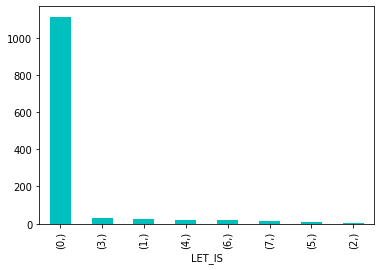

In [ ]:
LET_IS.value_counts().plot(kind='bar', color='c')

In [ ]:
Y_unica.value_counts()

Y_unica
0          549
9          162
11          77
1           51
10          38
6           33
8           32
4           21
7           17
5           15
3           12
2            4
dtype: int64

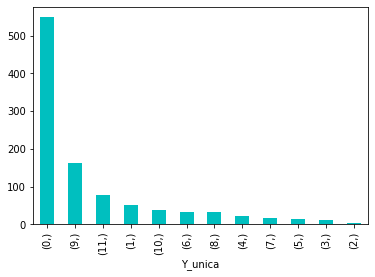

In [ ]:
Y_unica.value_counts().plot(kind='bar', color='c')

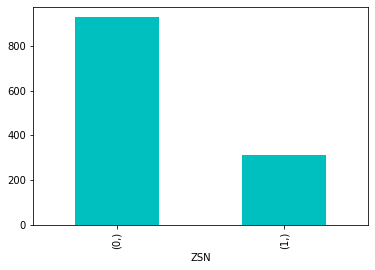

In [ ]:
ZSN.value_counts().plot(kind='bar', color='c')

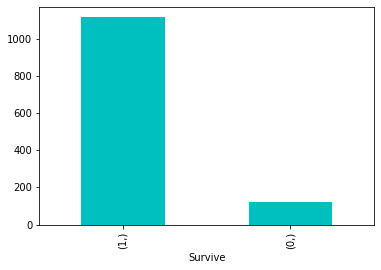

In [ ]:
Survive.value_counts().plot(kind='bar', color='c')

#Riduzione della dimensionalità





## PCA e T-SNE su X_COMPL

In [ ]:
X_compl_stand = StandardScaler().fit_transform(X_compl)

In [ ]:
pca2= PCA(n_components=2, random_state=22)
pca_fit2 = pca2.fit_transform(X_compl_stand)
print(pca2.explained_variance_ratio_)

[0.04068223 0.03279335]


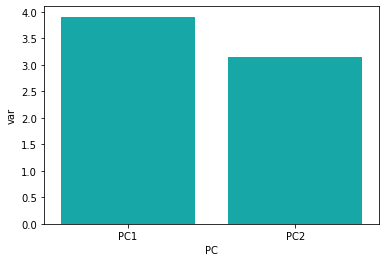

In [ ]:
df=pd.DataFrame({'var':pca2.explained_variance_, 'PC':['PC1','PC2']})
sns.barplot(x='PC', y='var', data=df, color='c')

In [ ]:
principalDf=pd.DataFrame(data=pca_fit2, columns=['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, Y_unica], axis = 1)
finalDf.head()

,principal component 1,principal component 2,Y_unica
0,3.063450,-2.007883,0
1,-2.225470,1.510167,0
2,-1.228922,-1.631536,0
3,-0.135003,-0.282562,9
4,0.176401,-0.808145,0


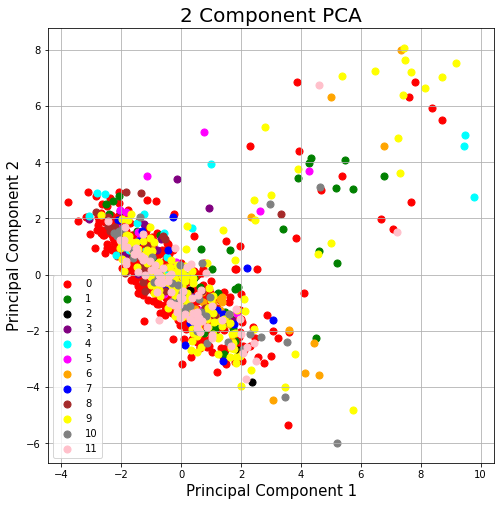

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
targets = [0,1,2,3,4,5,6,7,8,9,10,11]
colors = ['red', 'green', 'black','purple','cyan','magenta','orange','blue','brown','yellow','grey','pink']
for target, color in zip(targets,colors):
    indicesToKeep=finalDf['Y_unica']==target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
pca = PCA(random_state=22)
pca_fit = pca.fit_transform(X_compl_stand)

Text(0, 0.5, 'Var spiegata')

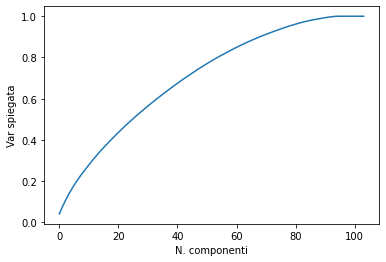

In [ ]:
pct_var_spiegata = pca.explained_variance_ / np.sum(pca.explained_variance_)
var_cum_spiegata = np.cumsum(pct_var_spiegata)
plt.plot(var_cum_spiegata)
plt.xlabel("N. componenti")
plt.ylabel("Var spiegata")

In [ ]:
var_cum_spiegata

array([0.04068245, 0.07347652, 0.10355684, 0.13120493, 0.15629752,
       0.17989195, 0.20151905, 0.22244344, 0.24152613, 0.2602436 ,
       0.27849322, 0.29646899, 0.313855  , 0.33079628, 0.34692648,
       0.36246385, 0.37761336, 0.39272162, 0.40738434, 0.42174335,
       0.43595863, 0.44987682, 0.46374844, 0.47705044, 0.49028538,
       0.50316378, 0.51594964, 0.52829977, 0.540444  , 0.55250915,
       0.56445587, 0.5761767 , 0.58782262, 0.59917559, 0.61035821,
       0.62142666, 0.6323791 , 0.64314422, 0.65380213, 0.66431478,
       0.67464742, 0.68494402, 0.69501283, 0.70494538, 0.71473627,
       0.72439066, 0.733863  , 0.74315764, 0.75239155, 0.76140134,
       0.77018766, 0.77884603, 0.78740778, 0.79568531, 0.80379879,
       0.81158795, 0.81926026, 0.82691926, 0.83448521, 0.84193375,
       0.84916944, 0.85622698, 0.86314624, 0.869852  , 0.8763934 ,
       0.88271842, 0.88901027, 0.89521934, 0.90119594, 0.9068591 ,
       0.9124257 , 0.91786984, 0.92319787, 0.92846299, 0.93364

In [ ]:
np.where(var_cum_spiegata>0.7)

(array([ 43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
         69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
         82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
         95,  96,  97,  98,  99, 100, 101, 102, 103]),)

44 componenti per avere il 70% di var spiegata. T-sne su queste 44 

In [ ]:
pca_44 = pd.DataFrame(pca_fit[:, 0:44])

In [ ]:
tsne = TSNE(random_state=22)
tsne_fit = tsne.fit_transform(pca_44)

In [ ]:
labels_Y_unica=Y_compl["Y_unica"]

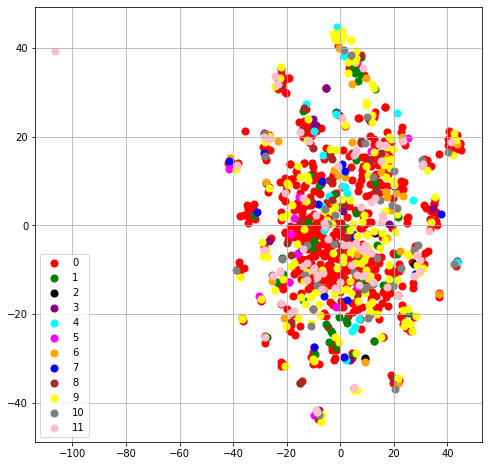

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
 
targets = [0,1,2,3,4,5,6,7,8,9,10,11]
colors = ['red', 'green', 'black','purple','cyan','magenta','orange','blue','brown','yellow','grey','pink']
 
for target, color in zip(targets,colors):
    indicesToKeep=labels_Y_unica==target
    ax.scatter(tsne_fit[indicesToKeep, 0]
               , tsne_fit[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

T-SNE su tutte le variabili del dataset X_compl

In [ ]:
tsne = TSNE(random_state=22)
tsne_fit_all= tsne.fit_transform(X_compl_stand)

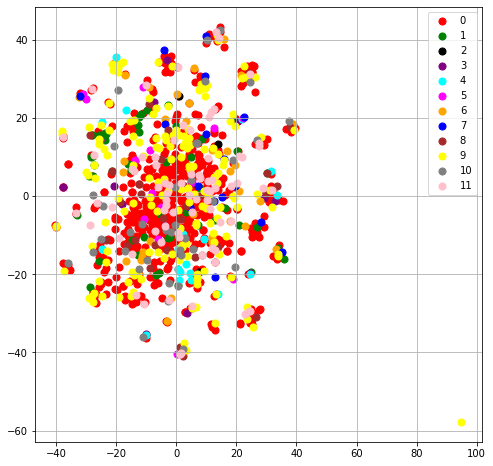

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
 
targets = [0,1,2,3,4,5,6,7,8,9,10,11]
colors = ['red', 'green', 'black','purple','cyan','magenta','orange','blue','brown','yellow','grey','pink']
 
for target, color in zip(targets,colors):
    indicesToKeep=labels_Y_unica==target
    ax.scatter(tsne_fit_all[indicesToKeep, 0]
               , tsne_fit_all[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## PCA e T-SNE su X

In [ ]:
X_stand = StandardScaler().fit_transform(X)

In [ ]:
pca2= PCA(n_components=2, random_state=22)
pca_fit2 = pca2.fit_transform(X_stand)
print(pca2.explained_variance_ratio_)

[0.0389536 0.0325774]


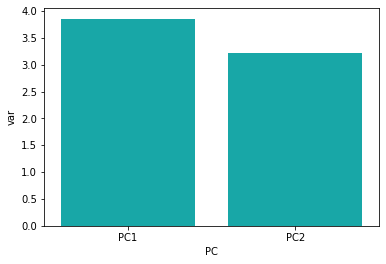

In [ ]:
df=pd.DataFrame({'var':pca2.explained_variance_, 'PC':['PC1','PC2']})
sns.barplot(x='PC', y='var', data=df, color='c')

In [ ]:
principalDf=pd.DataFrame(data=pca_fit2, columns=['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, Survive], axis = 1)
finalDf.head()

,principal component 1,principal component 2,Survive
0,3.023567,0.022415,1
1,-2.327698,0.397145,1
2,-0.459424,4.767670,1
3,-0.274961,-0.071340,1
4,0.107279,0.013580,1


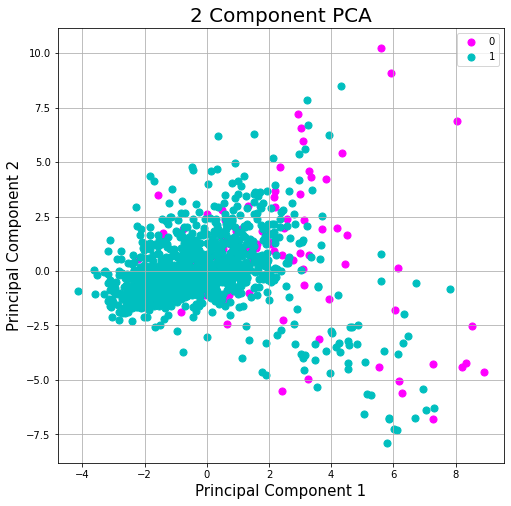

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
targets = [0,1]
colors = ['magenta', 'c']
for target, color in zip(targets,colors):
    indicesToKeep=finalDf['Survive']==target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
pca = PCA(random_state=22)
pca_fit = pca.fit_transform(X_stand)

Text(0, 0.5, 'Var spiegata')

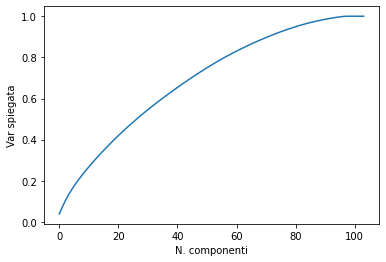

In [ ]:
pct_var_spiegata = pca.explained_variance_ / np.sum(pca.explained_variance_)
var_cum_spiegata = np.cumsum(pct_var_spiegata)
plt.plot(var_cum_spiegata)
plt.xlabel("N. componenti")
plt.ylabel("Var spiegata")

In [ ]:
var_cum_spiegata

array([0.03895371, 0.07153183, 0.10204183, 0.12896638, 0.15268778,
       0.17508132, 0.19552349, 0.2145758 , 0.23315524, 0.25066683,
       0.26764265, 0.28438811, 0.3007999 , 0.31687876, 0.33237259,
       0.34765155, 0.36256654, 0.37716123, 0.39168613, 0.40602677,
       0.4200184 , 0.43351818, 0.44686627, 0.45999753, 0.47271082,
       0.48535457, 0.49791488, 0.51039556, 0.52239226, 0.53425344,
       0.54600573, 0.5574281 , 0.56871837, 0.57977504, 0.59075852,
       0.60163711, 0.61236134, 0.62293242, 0.63345924, 0.64383809,
       0.65410031, 0.66415576, 0.67418496, 0.68407676, 0.69381106,
       0.70341401, 0.71288398, 0.72230863, 0.73168098, 0.74086146,
       0.74983377, 0.75866436, 0.76724864, 0.77575168, 0.78408984,
       0.79230904, 0.80037457, 0.80818951, 0.81569306, 0.82313747,
       0.83048295, 0.83781426, 0.84490748, 0.85194442, 0.85874134,
       0.86542862, 0.87184882, 0.8781828 , 0.88440537, 0.89053641,
       0.89662552, 0.90263933, 0.90843524, 0.91405764, 0.91953

In [ ]:
np.where(var_cum_spiegata>0.7)

(array([ 45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,
         58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
         71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
         97,  98,  99, 100, 101, 102, 103]),)

46 componenti per avere il 70% di var spiegata. T-sne su queste 46 

In [ ]:
pca_46 = pd.DataFrame(pca_fit[:, 0:46])

In [ ]:
tsne = TSNE(random_state=22)
tsne_fit = tsne.fit_transform(pca_46)

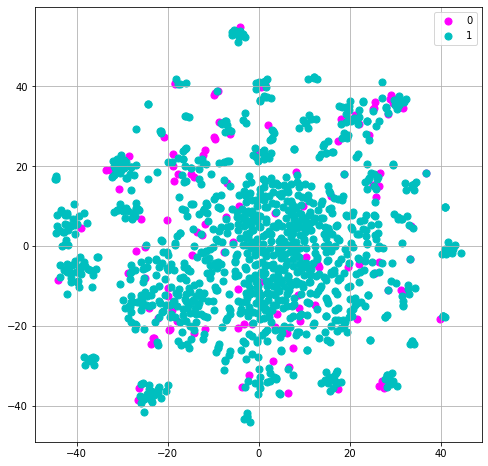

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
 
targets = [0,1]
colors = ['magenta', 'c']
 
for target, color in zip(targets,colors):
    indicesToKeep=finalDf['Survive']==target
    ax.scatter(tsne_fit[indicesToKeep, 0]
               , tsne_fit[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

T-SNE su tutte le variabili del dataset X

In [ ]:
tsne = TSNE(random_state=22)
tsne_fit_all= tsne.fit_transform(X_stand)

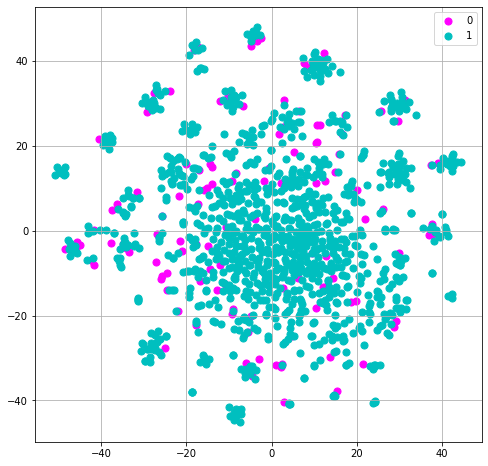

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
 
targets = [0,1]
colors = ['magenta', 'c']
 
for target, color in zip(targets,colors):
    indicesToKeep=finalDf['Survive']==target
    ax.scatter(tsne_fit_all[indicesToKeep, 0]
               , tsne_fit_all[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Metodologie ad albero per variabili multiclasse

## LET_IS

### Decision Trees con LET_IS

In [ ]:
X_train, X_test, Y_LET_train, Y_LET_test = train_test_split(X, LET_IS, test_size=0.3, random_state= 22)

Feature: 0, Score: 0.09773
Feature: 1, Score: 0.03615
Feature: 2, Score: 0.01302
Feature: 3, Score: 0.05286
Feature: 4, Score: 0.01210
Feature: 5, Score: 0.01721
Feature: 6, Score: 0.02162
Feature: 7, Score: 0.00861
Feature: 8, Score: 0.03520
Feature: 9, Score: 0.02116
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00933
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.01148
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00927
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.02505
Feature: 33, Score: 0.01212
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

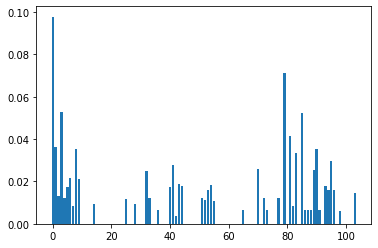

In [ ]:
model_imp = DecisionTreeClassifier(random_state=22)
model_imp.fit(X_train, Y_LET_train)
importance = model_imp.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
np.where(importance>0.015)

(array([ 0,  1,  3,  5,  6,  8,  9, 32, 40, 41, 43, 44, 53, 54, 70, 79, 81,
        83, 85, 89, 90, 93, 94, 95, 96]),)

In [ ]:
X_train_rid = X_train.iloc[:, [0,  1,  3,  5,  6,  8,  9, 32, 40, 41, 43, 44, 53, 54, 70, 79, 81,
        83, 85, 89, 90, 93, 94, 95, 96]]

In [ ]:
X_test_rid = X_test.iloc[:, [0,  1,  3,  5,  6,  8,  9, 32, 40, 41, 43, 44, 53, 54, 70, 79, 81,
        83, 85, 89, 90, 93, 94, 95, 96]]

In [ ]:
class_tree=DecisionTreeClassifier(random_state=22)
param = {'max_depth':range(1, 6), 'min_samples_split':range(3,20), 'min_samples_leaf':range(2,15)} 
grid = GridSearchCV(class_tree, param, cv=3)
grid.fit(X_train_rid, Y_LET_train)
print(grid.best_params_)

{'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 14}


In [ ]:
mod_tree=DecisionTreeClassifier(max_depth=3,min_samples_split=14,min_samples_leaf=3,random_state=22)
mod_tree.fit(X_train_rid, Y_LET_train)
text_representation = tree.export_text(mod_tree)
print(text_representation)

|--- feature_20 <= 0.50
|   |--- feature_6 <= 1.50
|   |   |--- feature_0 <= 65.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  65.50
|   |   |   |--- class: 0
|   |--- feature_6 >  1.50
|   |   |--- feature_0 <= 60.50
|   |   |   |--- class: 4
|   |   |--- feature_0 >  60.50
|   |   |   |--- class: 0
|--- feature_20 >  0.50
|   |--- feature_18 <= 38.50
|   |   |--- feature_13 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_13 >  0.50
|   |   |   |--- class: 0
|   |--- feature_18 >  38.50
|   |   |--- class: 1



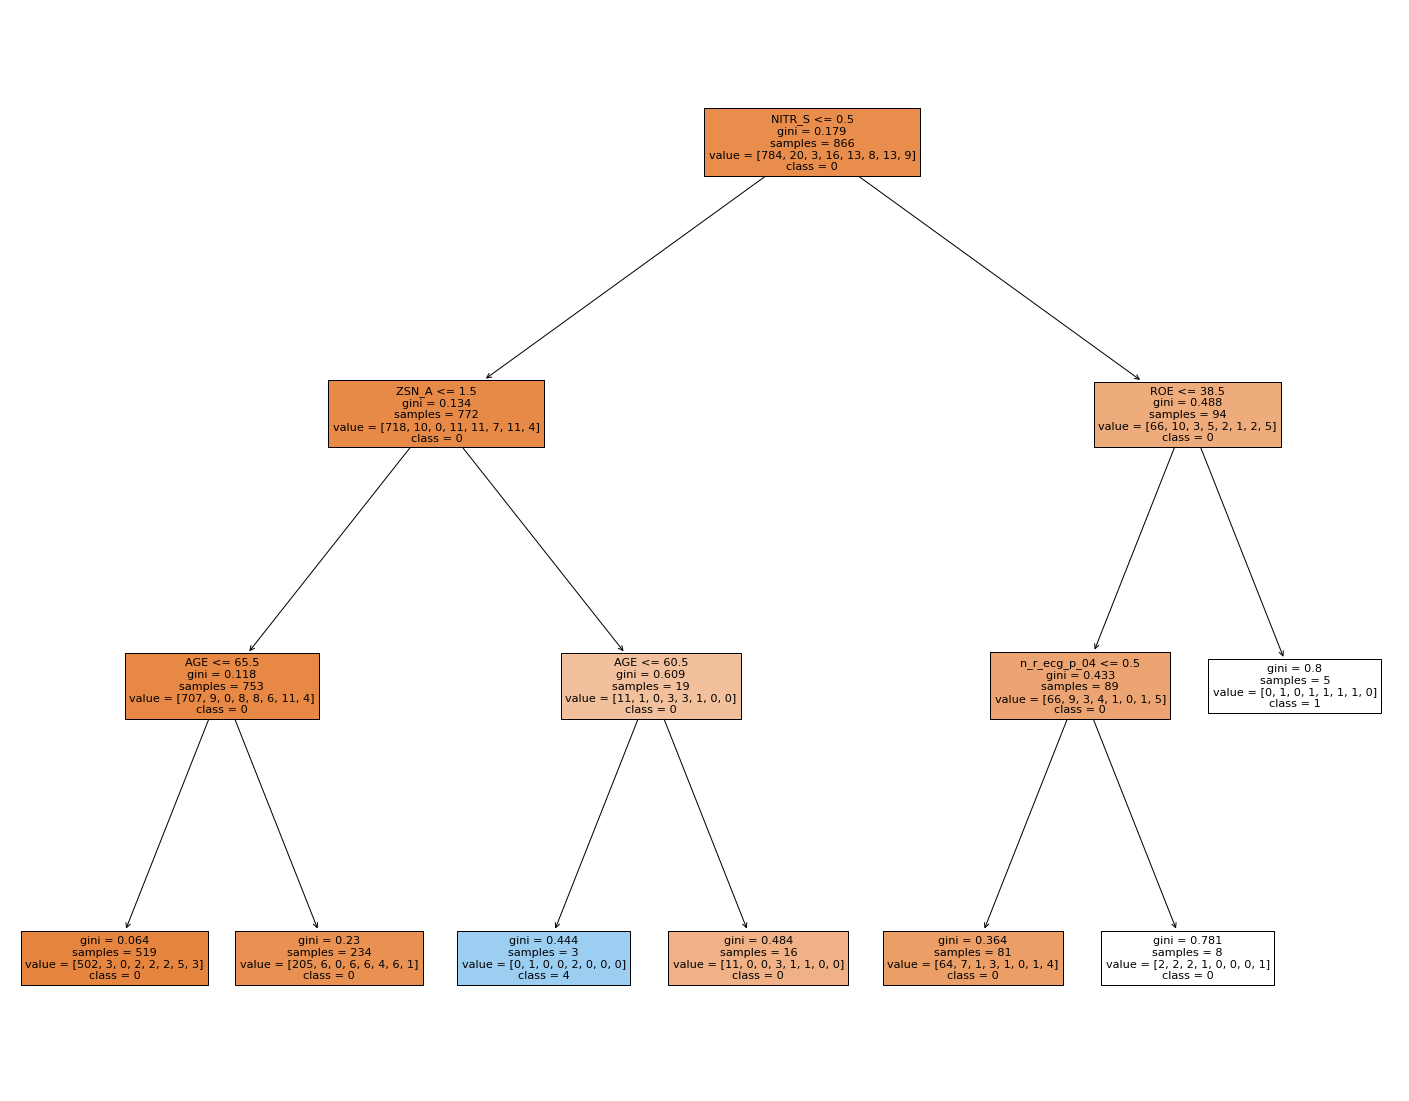

In [ ]:
fig1 = plt.figure(figsize=(25,20))
_ = tree.plot_tree(mod_tree,feature_names=list(X_train_rid.columns), class_names=['0', '1', '2', '3', '4', '5', '6', '7'],filled=True)

In [ ]:
y_train_pred = mod_tree.predict(X_train_rid)
print(classification_report(Y_LET_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       784
           1       0.20      0.05      0.08        20
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00        16
           4       0.67      0.15      0.25        13
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00         9

    accuracy                           0.91       866
   macro avg       0.22      0.15      0.16       866
weighted avg       0.84      0.91      0.87       866



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
y_test_pred = mod_tree.predict(X_test_rid)
print(classification_report(Y_LET_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       331
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         6

    accuracy                           0.88       372
   macro avg       0.11      0.12      0.12       372
weighted avg       0.79      0.88      0.83       372



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### Random Forest con LET_IS

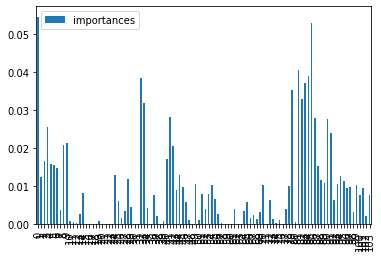

In [ ]:
model= RandomForestClassifier(n_estimators=100, random_state=22)
model.fit(X_train, Y_LET_train.values.ravel())
importances=model.feature_importances_
df_imp=pd.DataFrame({'Features':X_train.columns, 'importances':importances})
df_imp.plot(kind='bar')

In [ ]:
np.where(importances > 0.015)

(array([ 0,  2,  3,  4,  5,  8,  9, 32, 33, 40, 41, 42, 79, 81, 82, 83, 84,
        85, 86, 87, 90, 91]),)

In [ ]:
X_train_rid = X_train.iloc[:, [0,  2,  3,  4,  5,  8,  9, 32, 33, 40, 41, 42, 79, 81, 82, 83, 84,
        85, 86, 87, 90, 91]]

In [ ]:
X_test_rid = X_test.iloc[:, [0,  2,  3,  4,  5,  8,  9, 32, 33, 40, 41, 42, 79, 81, 82, 83, 84,
        85, 86, 87, 90, 91]]

In [ ]:
param = dict(n_estimators = [100], max_depth =range(5,10),  
              min_samples_split = range(2,20), 
             min_samples_leaf = range(2,15))
grid_search_cv = GridSearchCV(RandomForestClassifier(random_state=22), param, verbose=1, cv=3, n_jobs=-1)
grid_search_cv.fit(X_train_rid, Y_LET_train)
print(grid_search_cv.best_params_)

In [ ]:
rf=RandomForestClassifier(max_depth= 5, min_samples_leaf= 2, min_samples_split= 2, n_estimators= 100, random_state=22)
rf.fit(X_train_rid,Y_LET_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=22, verbose=0,
                       warm_start=False)

In [ ]:
y_train_pred = rf.predict(X_train_rid)
print(classification_report(Y_LET_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       784
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00        16
           4       1.00      0.08      0.14        13
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00         9

    accuracy                           0.91       866
   macro avg       0.24      0.13      0.14       866
weighted avg       0.84      0.91      0.86       866



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
y_test_pred = rf.predict(X_test_rid) 
print(classification_report(Y_LET_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       331
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         6

    accuracy                           0.89       372
   macro avg       0.11      0.12      0.12       372
weighted avg       0.79      0.89      0.84       372



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### XGBoost con LET_IS

In [ ]:
XGBclassifier= xgboost.XGBClassifier(random_state=22)

In [ ]:
XGBclassifier.fit(X_train, Y_LET_train.values.ravel())
importances=XGBclassifier.feature_importances_; importances

array([0.01861709, 0.01157914, 0.01280298, 0.02586679, 0.01627143,
       0.01872502, 0.01209156, 0.0108147 , 0.01631074, 0.01886195,
       0.        , 0.        , 0.        , 0.01999694, 0.01223157,
       0.        , 0.        , 0.        , 0.        , 0.0118804 ,
       0.        , 0.        , 0.        , 0.        , 0.02027726,
       0.01188606, 0.        , 0.00619405, 0.00977459, 0.01890019,
       0.        , 0.        , 0.01597716, 0.01453039, 0.01387739,
       0.        , 0.01539263, 0.        , 0.        , 0.        ,
       0.01876355, 0.02080927, 0.01146188, 0.01121436, 0.02888284,
       0.01414129, 0.02027477, 0.01246753, 0.        , 0.02657258,
       0.        , 0.01411988, 0.        , 0.02108654, 0.01542632,
       0.01606851, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01514044, 0.        , 0.        , 0.01189918,
       0.01881781, 0.        , 0.        , 0.        , 0.        ,
       0.01630748, 0.        , 0.01220631, 0.        , 0.     

In [ ]:
np.where(importances>0.015)

(array([ 0,  3,  4,  5,  8,  9, 13, 24, 29, 32, 36, 40, 41, 44, 46, 49, 53,
        54, 55, 61, 65, 70, 85, 86, 87, 89, 90, 93, 94]),)

In [ ]:
X_train_rid = X_train.iloc[:, [0,  3,  4,  5,  8,  9, 13, 24, 29, 32, 36, 40, 41, 44, 46, 49, 53,
        54, 55, 61, 65, 70, 85, 86, 87, 89, 90, 93, 94 ]]

In [ ]:
X_test_rid = X_test.iloc[:, [0,  3,  4,  5,  8,  9, 13, 24, 29, 32, 36, 40, 41, 44, 46, 49, 53,
        54, 55, 61, 65, 70, 85, 86, 87, 89, 90, 93, 94]]

In [ ]:
XGBparams = dict(eta=[0.05, 0.10, 0.15, 0.20], gamma=[ 0.0, 0.1, 0.2 , 0.3],
                 max_depth=[ 3, 4, 5, 6, 8, 10], min_child_weight=[ 1, 3, 5],
                 colsample_bytree=[ 0.3, 0.4, 0.5])

In [ ]:
grid_search_XGB = GridSearchCV(XGBclassifier, XGBparams,verbose=1, cv=3, n_jobs=-1)
grid_search_XGB.fit(X_train_rid,Y_LET_train.values.ravel())
print(grid_search_XGB.best_params_)

In [ ]:
XGBclassifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.3, eta=0.05,
       max_delta_step=0, max_depth=8, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softmax',num_class=12, random_state=22, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [ ]:
XGBclassifier.fit(X_train_rid,Y_LET_train.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eta=0.05, gamma=0.3,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, num_class=12, objective='multi:softprob',
              random_state=22, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1, verbosity=1)

In [ ]:
y_train_pred=XGBclassifier.predict(X_train_rid)
print(classification_report(Y_LET_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       784
           1       1.00      0.95      0.97        20
           2       1.00      1.00      1.00         3
           3       1.00      0.94      0.97        16
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00         8
           6       1.00      0.69      0.82        13
           7       1.00      1.00      1.00         9

    accuracy                           0.99       866
   macro avg       1.00      0.95      0.97       866
weighted avg       0.99      0.99      0.99       866



In [ ]:
y_test_pred = XGBclassifier.predict(X_test_rid)
print(classification_report(Y_LET_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       331
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         6

    accuracy                           0.88       372
   macro avg       0.11      0.12      0.12       372
weighted avg       0.79      0.88      0.84       372



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## Y_UNICA

###Decision Tree con Y_UNICA

#### Decision Tree Y_UNICA no balanced

In [ ]:
X_compl_train, X_compl_test, Y_unica_train, Y_unica_test = train_test_split(X_compl, Y_unica, test_size=0.3, random_state= 22)

Feature: 0, Score: 0.04350
Feature: 1, Score: 0.00830
Feature: 2, Score: 0.02065
Feature: 3, Score: 0.01506
Feature: 4, Score: 0.00986
Feature: 5, Score: 0.01280
Feature: 6, Score: 0.01623
Feature: 7, Score: 0.00078
Feature: 8, Score: 0.01340
Feature: 9, Score: 0.06045
Feature: 10, Score: 0.01328
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00913
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.01133
Feature: 25, Score: 0.00786
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00699
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.04156
Feature: 33, Score: 0.04265
Feature: 34, Score: 0.01146
Feature: 35, Score: 0.00000
Fe

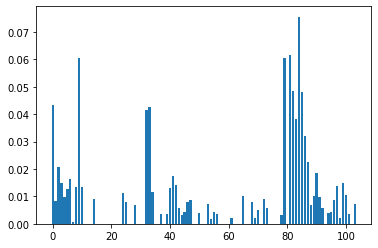

In [ ]:
model_imp = DecisionTreeClassifier(random_state=22)
model_imp.fit(X_compl_train, Y_unica_train)
importance = model_imp.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
np.where(importance>0.01)

(array([  0,   2,   3,   5,   6,   8,   9,  10,  24,  32,  33,  34,  40,
         41,  42,  65,  79,  81,  82,  83,  84,  85,  86,  87,  89,  90,
         97,  99, 100]),)

In [ ]:
X_train_rid = X_compl_train.iloc[:, [0,   2,   3,   5,   6,   8,   9,  10,  24,  32,  33,  34,  40,
         41,  42,  65,  79,  81,  82,  83,  84,  85,  86,  87,  89,  90,
         97,  99, 100]]

In [ ]:
X_test_rid = X_compl_test.iloc[:, [0,   2,   3,   5,   6,   8,   9,  10,  24,  32,  33,  34,  40,
         41,  42,  65,  79,  81,  82,  83,  84,  85,  86,  87,  89,  90,
         97,  99, 100]]

In [ ]:
class_tree=DecisionTreeClassifier(random_state=22)
param = {'max_depth':range(1, 6), 'min_samples_split':range(2,20), 'min_samples_leaf':range(2,15)} 
grid = GridSearchCV(class_tree, param, cv=3)
grid.fit(X_train_rid, Y_unica_train)
print(grid.best_params_)

In [ ]:
mod_tree=DecisionTreeClassifier(max_depth=3,min_samples_split=19,min_samples_leaf=9,random_state=22)
mod_tree.fit(X_train_rid, Y_unica_train)
text_representation = tree.export_text(mod_tree)
print(text_representation)

|--- feature_6 <= 0.50
|   |--- feature_25 <= 0.50
|   |   |--- feature_0 <= 60.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  60.50
|   |   |   |--- class: 0
|   |--- feature_25 >  0.50
|   |   |--- feature_1 <= 1.50
|   |   |   |--- class: 6
|   |   |--- feature_1 >  1.50
|   |   |   |--- class: 0
|--- feature_6 >  0.50
|   |--- feature_6 <= 1.50
|   |   |--- feature_17 <= 136.24
|   |   |   |--- class: 9
|   |   |--- feature_17 >  136.24
|   |   |   |--- class: 9
|   |--- feature_6 >  1.50
|   |   |--- feature_18 <= 0.27
|   |   |   |--- class: 0
|   |   |--- feature_18 >  0.27
|   |   |   |--- class: 9



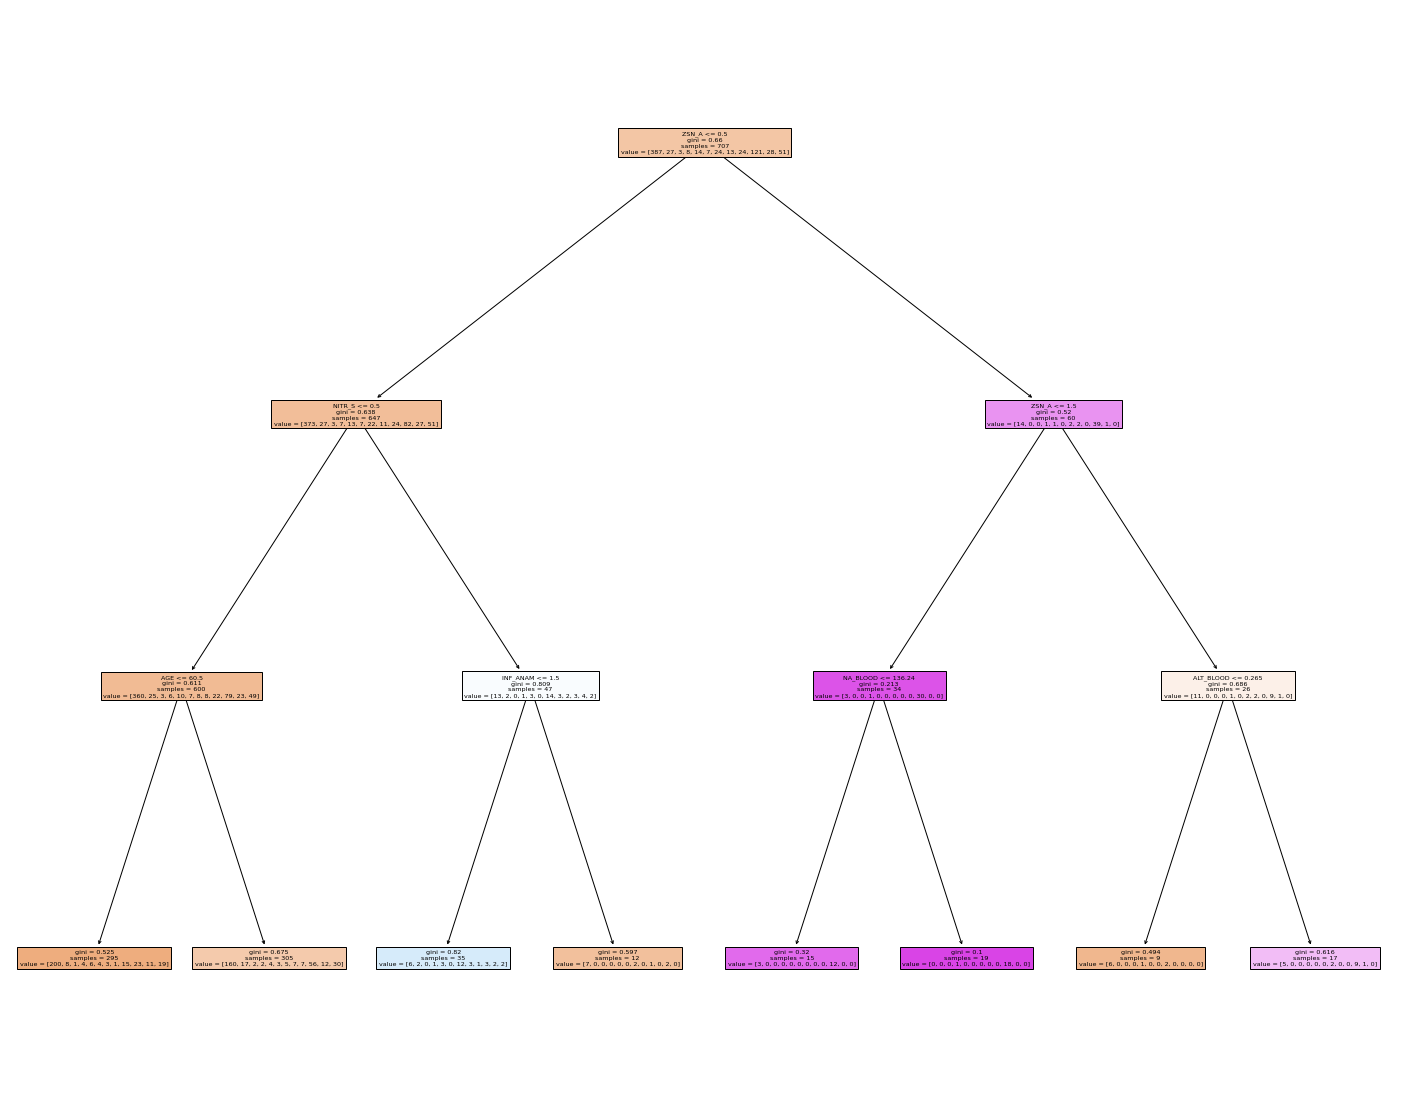

In [ ]:
fig1 = plt.figure(figsize=(25,20))
_ = tree.plot_tree(mod_tree,feature_names=list(X_train_rid.columns),filled=True)

In [ ]:
y_train_pred = mod_tree.predict(X_train_rid)
print(classification_report(Y_unica_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.60      0.96      0.74       387
           1       0.00      0.00      0.00        27
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        14
           5       0.00      0.00      0.00         7
           6       0.34      0.50      0.41        24
           7       0.00      0.00      0.00        13
           8       0.00      0.00      0.00        24
           9       0.76      0.32      0.45       121
          10       0.00      0.00      0.00        28
          11       0.00      0.00      0.00        51

    accuracy                           0.60       707
   macro avg       0.14      0.15      0.13       707
weighted avg       0.47      0.60      0.50       707



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
y_test_pred = mod_tree.predict(X_test_rid)
print(classification_report(Y_unica_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.58      0.93      0.71       162
           1       0.00      0.00      0.00        24
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         8
           6       0.10      0.22      0.14         9
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         8
           9       0.64      0.34      0.44        41
          10       0.00      0.00      0.00        10
          11       0.00      0.00      0.00        26

    accuracy                           0.55       304
   macro avg       0.11      0.12      0.11       304
weighted avg       0.40      0.55      0.44       304



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



####Decision Tree Y_UNICA class_weight=balanced

In [ ]:
X_compl_train, X_compl_test, Y_unica_train, Y_unica_test = train_test_split(X_compl, Y_unica, test_size=0.3, random_state= 22)

Feature: 0, Score: 0.06976
Feature: 1, Score: 0.00496
Feature: 2, Score: 0.01398
Feature: 3, Score: 0.03893
Feature: 4, Score: 0.00396
Feature: 5, Score: 0.02481
Feature: 6, Score: 0.02449
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01558
Feature: 9, Score: 0.00548
Feature: 10, Score: 0.00633
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00320
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00778
Feature: 25, Score: 0.00085
Feature: 26, Score: 0.00043
Feature: 27, Score: 0.02145
Feature: 28, Score: 0.00327
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.06354
Feature: 33, Score: 0.01601
Feature: 34, Score: 0.00612
Feature: 35, Score: 0.00000
Fe

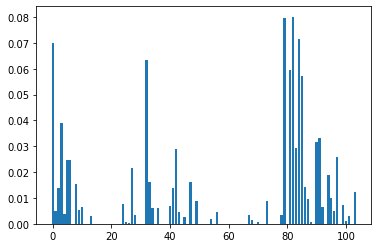

In [ ]:
model_imp = DecisionTreeClassifier(random_state=22, class_weight="balanced")
model_imp.fit(X_compl_train, Y_unica_train)
importance = model_imp.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
np.where(importance>0.01)

(array([  0,   2,   3,   5,   6,   8,  27,  32,  33,  41,  42,  47,  79,
         81,  82,  83,  84,  85,  86,  90,  91,  94,  95,  97, 103]),)

In [ ]:
X_train_rid = X_compl_train.iloc[:, [0,   2,   3,   5,   6,   8,  27,  32,  33,  41,  42,  47,  79,
         81,  82,  83,  84,  85,  86,  90,  91,  94,  95,  97, 103]]

In [ ]:
X_test_rid = X_compl_test.iloc[:, [0,   2,   3,   5,   6,   8,  27,  32,  33,  41,  42,  47,  79,
         81,  82,  83,  84,  85,  86,  90,  91,  94,  95,  97, 103]]

In [ ]:
class_tree=DecisionTreeClassifier(random_state=22, class_weight="balanced")
param = {'max_depth':range(1, 6), 'min_samples_split':range(2,20), 'min_samples_leaf':range(2,15)} 
grid = GridSearchCV(class_tree, param, cv=3)
grid.fit(X_train_rid, Y_unica_train)
print(grid.best_params_)

In [ ]:
mod_tree=DecisionTreeClassifier(max_depth=5,min_samples_split=2,min_samples_leaf=2,random_state=22, class_weight="balanced")
mod_tree.fit(X_train_rid, Y_unica_train)
text_representation = tree.export_text(mod_tree)
print(text_representation)

|--- feature_12 <= 3.55
|   |--- feature_2 <= 0.50
|   |   |--- feature_4 <= 0.50
|   |   |   |--- feature_20 <= 1.50
|   |   |   |   |--- feature_17 <= 4.50
|   |   |   |   |   |--- class: 10
|   |   |   |   |--- feature_17 >  4.50
|   |   |   |   |   |--- class: 8
|   |   |   |--- feature_20 >  1.50
|   |   |   |   |--- class: 4
|   |   |--- feature_4 >  0.50
|   |   |   |--- feature_9 <= 1.50
|   |   |   |   |--- feature_16 <= 7.80
|   |   |   |   |   |--- class: 6
|   |   |   |   |--- feature_16 >  7.80
|   |   |   |   |   |--- class: 7
|   |   |   |--- feature_9 >  1.50
|   |   |   |   |--- feature_24 <= 0.50
|   |   |   |   |   |--- class: 6
|   |   |   |   |--- feature_24 >  0.50
|   |   |   |   |   |--- class: 9
|   |--- feature_2 >  0.50
|   |   |--- feature_17 <= 12.78
|   |   |   |--- feature_14 <= 0.47
|   |   |   |   |--- feature_20 <= 0.50
|   |   |   |   |   |--- class: 8
|   |   |   |   |--- feature_20 >  0.50
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_1

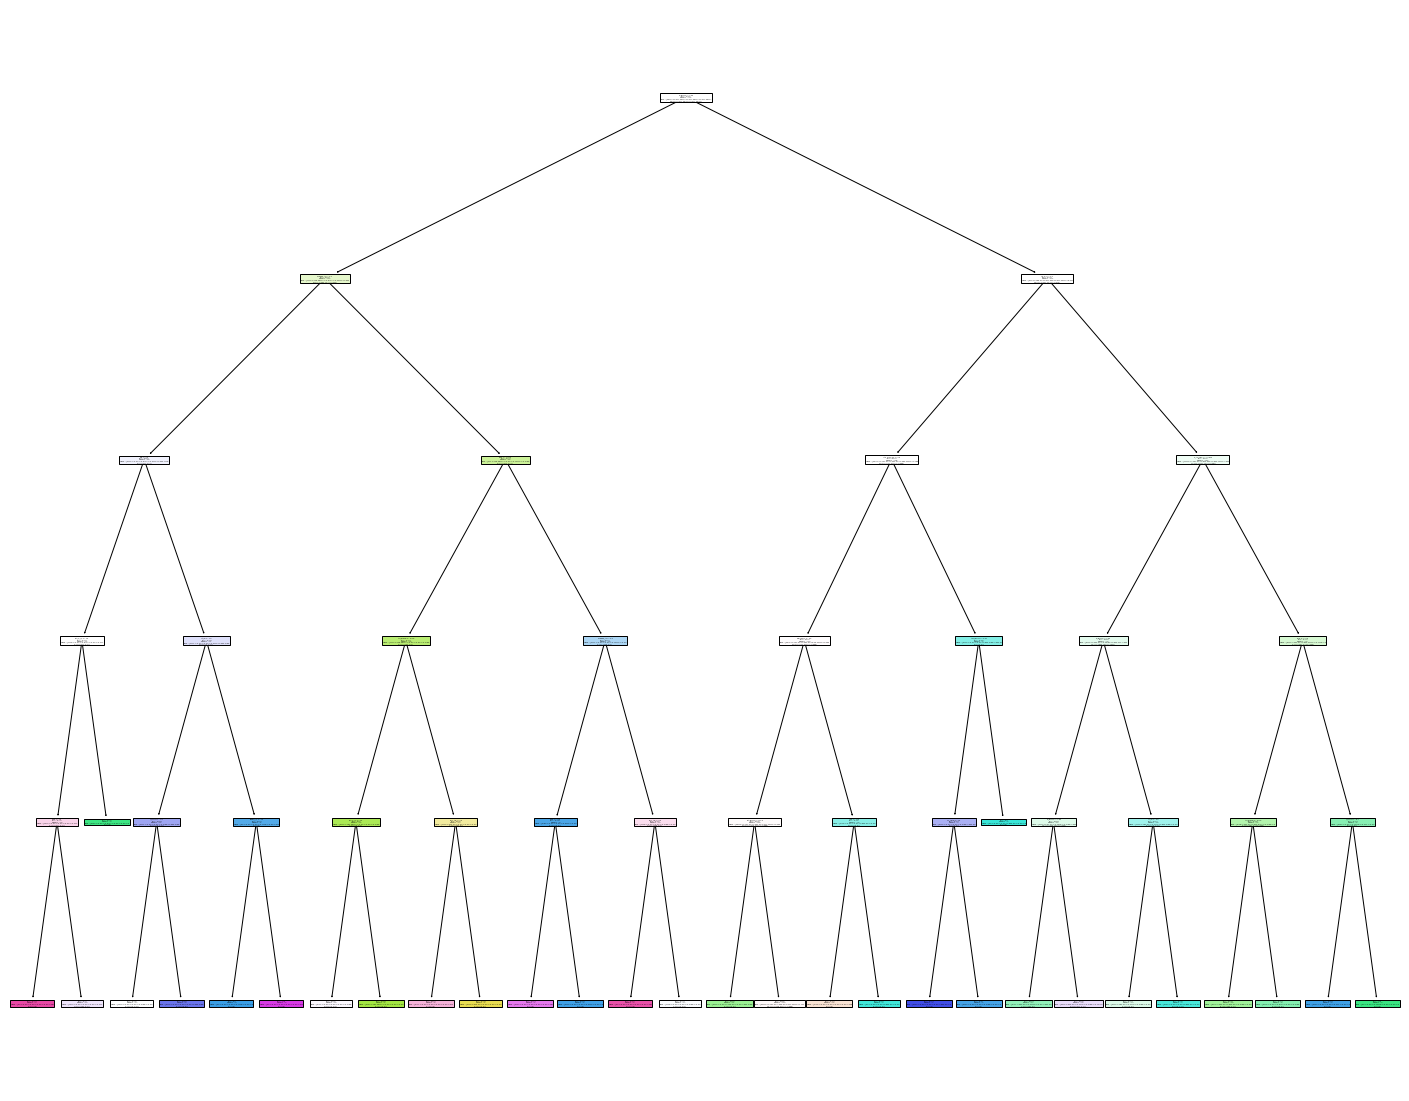

In [ ]:
fig1 = plt.figure(figsize=(25,20))
_ = tree.plot_tree(mod_tree,feature_names=list(X_train_rid.columns),filled=True)

In [ ]:
y_train_pred = mod_tree.predict(X_train_rid)
print(classification_report(Y_unica_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.81      0.07      0.14       387
           1       0.50      0.11      0.18        27
           2       0.50      1.00      0.67         3
           3       0.09      0.88      0.17         8
           4       0.29      0.93      0.44        14
           5       0.67      0.86      0.75         7
           6       0.25      0.50      0.33        24
           7       0.36      0.31      0.33        13
           8       0.12      0.38      0.19        24
           9       0.75      0.02      0.05       121
          10       0.40      0.21      0.28        28
          11       0.09      0.71      0.17        51

    accuracy                           0.19       707
   macro avg       0.40      0.50      0.31       707
weighted avg       0.65      0.19      0.16       707



In [ ]:
y_test_pred = mod_tree.predict(X_test_rid)
print(classification_report(Y_unica_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.54      0.04      0.08       162
           1       0.00      0.00      0.00        24
           2       0.00      0.00      0.00         1
           3       0.06      0.50      0.11         4
           4       0.15      0.43      0.22         7
           5       0.00      0.00      0.00         8
           6       0.17      0.22      0.19         9
           7       0.00      0.00      0.00         4
           8       0.03      0.12      0.05         8
           9       0.00      0.00      0.00        41
          10       0.00      0.00      0.00        10
          11       0.08      0.50      0.13        26

    accuracy                           0.09       304
   macro avg       0.09      0.15      0.07       304
weighted avg       0.30      0.09      0.07       304



### Random Forest con Y_UNICA


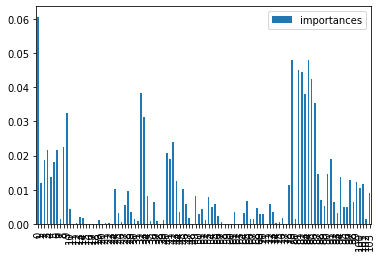

In [ ]:
model= RandomForestClassifier(n_estimators=100, random_state=22)
model.fit(X_compl_train, Y_unica_train.values.ravel())
importances=model.feature_importances_
df_imp=pd.DataFrame({'Features':X_compl_train.columns, 'importances':importances})
df_imp.plot(kind='bar')

In [ ]:
np.where(importances > 0.01)

(array([  0,   1,   2,   3,   4,   5,   6,   8,   9,  24,  32,  33,  40,
         41,  42,  43,  45,  78,  79,  81,  82,  83,  84,  85,  86,  87,
         90,  91,  94,  97,  99, 100, 101]),)

In [ ]:
X_train_rid = X_compl_train.iloc[:, [0,   1,   2,   3,   4,   5,   6,   8,   9,  24,  32,  33,  40,
         41,  42,  43,  45,  78,  79,  81,  82,  83,  84,  85,  86,  87,
         90,  91,  94,  97,  99, 100, 101]] 

In [ ]:
X_test_rid = X_compl_test.iloc[:, [ 0,   1,   2,   3,   4,   5,   6,   8,   9,  24,  32,  33,  40,
         41,  42,  43,  45,  78,  79,  81,  82,  83,  84,  85,  86,  87,
         90,  91,  94,  97,  99, 100, 101]]

In [ ]:
param = dict(n_estimators = [100], max_depth =range(5,10),  
              min_samples_split = range(2,20), 
             min_samples_leaf = range(2,15))
grid_search_cv = GridSearchCV(RandomForestClassifier(random_state=22), param, verbose=1, cv=3, n_jobs=-1)
grid_search_cv.fit(X_train_rid, Y_unica_train)
print(grid_search_cv.best_params_)

In [ ]:
rf=RandomForestClassifier(max_depth= 6, min_samples_leaf= 3, min_samples_split= 7, n_estimators= 100, random_state=22)
rf.fit(X_train_rid,Y_unica_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=22, verbose=0,
                       warm_start=False)

In [ ]:
y_train_pred = rf.predict(X_train_rid)
print(classification_report(Y_unica_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.59      1.00      0.74       387
           1       0.00      0.00      0.00        27
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        14
           5       0.00      0.00      0.00         7
           6       1.00      0.08      0.15        24
           7       0.00      0.00      0.00        13
           8       0.00      0.00      0.00        24
           9       0.90      0.39      0.54       121
          10       0.00      0.00      0.00        28
          11       0.00      0.00      0.00        51

    accuracy                           0.62       707
   macro avg       0.21      0.12      0.12       707
weighted avg       0.51      0.62      0.50       707



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
y_test_pred = rf.predict(X_test_rid) 
print(classification_report(Y_unica_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.56      0.99      0.72       162
           1       0.00      0.00      0.00        24
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         8
           9       0.74      0.34      0.47        41
          10       0.00      0.00      0.00        10
          11       0.00      0.00      0.00        26

    accuracy                           0.57       304
   macro avg       0.11      0.11      0.10       304
weighted avg       0.40      0.57      0.44       304



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### Random Forest con Y_UNICA e weights=balanced

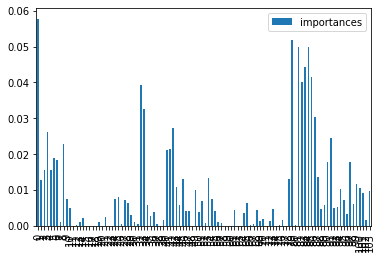

In [ ]:
model= RandomForestClassifier(n_estimators=100, random_state=22, class_weight="balanced")
model.fit(X_compl_train, Y_unica_train.values.ravel())
importances=model.feature_importances_
df_imp=pd.DataFrame({'Features':X_compl_train.columns, 'importances':importances})
df_imp.plot(kind='bar')

In [ ]:
np.where(importances > 0.01)

(array([  0,   1,   2,   3,   4,   5,   6,   8,  32,  33,  40,  41,  42,
         43,  45,  53,  78,  79,  81,  82,  83,  84,  85,  86,  87,  90,
         91,  94,  97,  99, 100]),)

In [ ]:
X_train_rid = X_compl_train.iloc[:, [ 0,   1,   2,   3,   4,   5,   6,   8,  32,  33,  40,  41,  42,
         43,  45,  53,  78,  79,  81,  82,  83,  84,  85,  86,  87,  90,
         91,  94,  97,  99, 100]]

In [ ]:
X_test_rid = X_compl_test.iloc[:, [ 0,   1,   2,   3,   4,   5,   6,   8,  32,  33,  40,  41,  42,
         43,  45,  53,  78,  79,  81,  82,  83,  84,  85,  86,  87,  90,
         91,  94,  97,  99, 100]]

In [ ]:
param = dict(n_estimators = [100], max_depth =range(5,10),  
             min_samples_split = range(2,20), 
            min_samples_leaf = range(2,15))
grid_search_cv = GridSearchCV(RandomForestClassifier(random_state=22, class_weight="balanced"), param, verbose=1, cv=3, n_jobs=-1)
grid_search_cv.fit(X_train_rid, Y_unica_train.values.ravel())
print(grid_search_cv.best_params_)

In [ ]:
rf=RandomForestClassifier(max_depth= 9, min_samples_leaf= 2, min_samples_split= 2, n_estimators= 100, random_state=22, 
                          class_weight="balanced")
rf.fit(X_train_rid,Y_unica_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=22, verbose=0,
                       warm_start=False)

In [ ]:
y_train_pred = rf.predict(X_train_rid) 
print(classification_report(Y_unica_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       387
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         7
           6       0.96      1.00      0.98        24
           7       1.00      1.00      1.00        13
           8       1.00      1.00      1.00        24
           9       0.98      0.98      0.98       121
          10       1.00      1.00      1.00        28
          11       1.00      1.00      1.00        51

    accuracy                           0.99       707
   macro avg       0.99      1.00      1.00       707
weighted avg       0.99      0.99      0.99       707



In [ ]:
y_test_pred = rf.predict(X_test_rid) 
print(classification_report(Y_unica_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.57      0.80      0.67       162
           1       0.50      0.12      0.20        24
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         4
           4       0.50      0.29      0.36         7
           5       0.00      0.00      0.00         8
           6       0.12      0.11      0.12         9
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         8
           9       0.17      0.20      0.18        41
          10       0.20      0.10      0.13        10
          11       0.17      0.04      0.06        26

    accuracy                           0.48       304
   macro avg       0.19      0.14      0.14       304
weighted avg       0.40      0.48      0.42       304



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### XGBoost con Y_UNICA

In [ ]:
XGBclassifier= xgboost.XGBClassifier(random_state=22)

In [ ]:
XGBclassifier.fit(X_compl_train, Y_unica_train.values.ravel())
importances=XGBclassifier.feature_importances_; importances

array([0.01403158, 0.00916948, 0.01122881, 0.01386247, 0.00912576,
       0.01429811, 0.01581339, 0.0100686 , 0.01358382, 0.07115649,
       0.0090455 , 0.        , 0.00703202, 0.        , 0.00830098,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.0119691 ,
       0.00472155, 0.        , 0.01478855, 0.01709492, 0.0152382 ,
       0.        , 0.        , 0.01271369, 0.01102589, 0.0290034 ,
       0.        , 0.00989929, 0.        , 0.        , 0.        ,
       0.01558151, 0.01495397, 0.01255731, 0.01092845, 0.01446936,
       0.01168698, 0.01969935, 0.0243367 , 0.        , 0.01062865,
       0.01019063, 0.00881343, 0.        , 0.0116195 , 0.02165012,
       0.02657713, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01116076, 0.        , 0.        , 0.02003602,
       0.01228666, 0.        , 0.        , 0.01119762, 0.01427916,
       0.02392699, 0.        , 0.02487503, 0.01233547, 0.     

In [ ]:
np.where(importances>0.012)

(array([ 0,  3,  5,  6,  8,  9, 27, 28, 29, 32, 34, 40, 41, 42, 44, 46, 47,
        54, 55, 64, 65, 69, 70, 72, 73, 78, 81, 82, 83, 86, 89, 90, 95, 96,
        97, 98]),)

In [ ]:
X_train_rid = X_compl_train.iloc[:, [0,  3,  5,  6,  8,  9, 27, 28, 29, 32, 34, 40, 41, 42, 44, 46, 47,
        54, 55, 64, 65, 69, 70, 72, 73, 78, 81, 82, 83, 86, 89, 90, 95, 96,
        97, 98]]

In [ ]:
X_test_rid = X_compl_test.iloc[:, [0,  3,  5,  6,  8,  9, 27, 28, 29, 32, 34, 40, 41, 42, 44, 46, 47,
        54, 55, 64, 65, 69, 70, 72, 73, 78, 81, 82, 83, 86, 89, 90, 95, 96,
        97, 98]]

In [ ]:
XGBparams = dict(eta=[0.05, 0.10, 0.15, 0.20], gamma=[ 0.0, 0.1, 0.2 , 0.3],
                 max_depth=[ 3, 4, 5, 6, 8, 10], min_child_weight=[ 1, 3, 5],
                 colsample_bytree=[ 0.3, 0.4, 0.5])

In [ ]:
grid_search_XGB = GridSearchCV(XGBclassifier, XGBparams,verbose=1, cv=3, n_jobs=-1)
grid_search_XGB.fit(X_train_rid,Y_unica_train.values.ravel())
print(grid_search_XGB.best_params_)

In [ ]:
XGBclassifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.3, eta=0.05,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softmax',num_class=12, random_state=22, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [ ]:
XGBclassifier.fit(X_train_rid,Y_unica_train.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eta=0.05, gamma=0.3,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, num_class=12, objective='multi:softprob',
              random_state=22, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1, verbosity=1)

In [ ]:
y_train_pred=XGBclassifier.predict(X_train_rid)
print(classification_report(Y_unica_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.70      0.99      0.82       387
           1       1.00      0.37      0.54        27
           2       1.00      0.67      0.80         3
           3       1.00      0.75      0.86         8
           4       1.00      0.71      0.83        14
           5       1.00      0.71      0.83         7
           6       0.95      0.83      0.89        24
           7       1.00      0.77      0.87        13
           8       1.00      0.25      0.40        24
           9       0.90      0.54      0.67       121
          10       1.00      0.43      0.60        28
          11       1.00      0.16      0.27        51

    accuracy                           0.76       707
   macro avg       0.96      0.60      0.70       707
weighted avg       0.82      0.76      0.73       707



In [ ]:
y_test_pred = XGBclassifier.predict(X_test_rid)
print(classification_report(Y_unica_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.58      0.93      0.71       162
           1       0.33      0.04      0.07        24
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         8
           6       0.14      0.11      0.12         9
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         8
           9       0.47      0.39      0.43        41
          10       0.00      0.00      0.00        10
          11       0.00      0.00      0.00        26

    accuracy                           0.55       304
   macro avg       0.13      0.12      0.11       304
weighted avg       0.40      0.55      0.45       304



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## Applicazione algoritmo SMOTE (numerosità uguale) Y_UNICA

In [ ]:
X_compl_train, X_compl_test, Y_unica_train, Y_unica_test = train_test_split(X_compl, Y_unica, test_size=0.3, random_state= 22)

In [ ]:
oversample = SMOTE(k_neighbors=2, random_state=22)
X_Smote_train, Y_Smote_train = oversample.fit_resample(X_compl_train,Y_unica_train.values.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

Class=9, n=387 (8.333%)
Class=0, n=387 (8.333%)
Class=10, n=387 (8.333%)
Class=5, n=387 (8.333%)
Class=4, n=387 (8.333%)
Class=8, n=387 (8.333%)
Class=3, n=387 (8.333%)
Class=6, n=387 (8.333%)
Class=1, n=387 (8.333%)
Class=7, n=387 (8.333%)
Class=11, n=387 (8.333%)
Class=2, n=387 (8.333%)


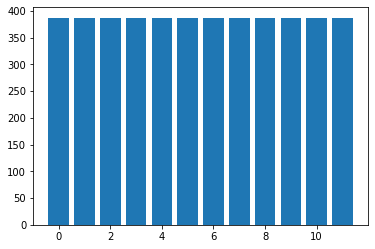

In [ ]:
counter = Counter(Y_Smote_train)
for k,v in counter.items():
	per = v / len(Y_Smote_train) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [ ]:
X_Smote_train=round(pd.DataFrame(X_Smote_train, columns=X_compl.columns),0)

In [ ]:
Y_Smote_train=pd.DataFrame(Y_Smote_train)

### Decision Tree SMOTE Y_UNICA

Feature: 0, Score: 0.06696
Feature: 1, Score: 0.01370
Feature: 2, Score: 0.02080
Feature: 3, Score: 0.02867
Feature: 4, Score: 0.03121
Feature: 5, Score: 0.01991
Feature: 6, Score: 0.01716
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.02436
Feature: 9, Score: 0.01557
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00043
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00645
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00846
Feature: 25, Score: 0.00044
Feature: 26, Score: 0.00031
Feature: 27, Score: 0.01614
Feature: 28, Score: 0.01753
Feature: 29, Score: 0.00023
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00044
Feature: 32, Score: 0.06307
Feature: 33, Score: 0.02654
Feature: 34, Score: 0.00705
Feature: 35, Score: 0.00000
Fe

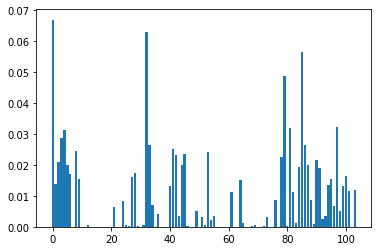

In [ ]:
model_imp = DecisionTreeClassifier(random_state=22)
model_imp.fit(X_Smote_train,Y_Smote_train)
importance = model_imp.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
np.where(importance>0.015)

(array([  0,   2,   3,   4,   5,   6,   8,   9,  27,  28,  32,  33,  41,
         42,  44,  45,  53,  64,  78,  79,  81,  84,  85,  86,  87,  90,
         91,  95,  97, 100]),)

In [ ]:
X_Smote_train_rid = X_Smote_train.iloc[:, [0,   2,   3,   4,   5,   6,   8,   9,  27,  28,  32,  33,  41,
         42,  44,  45,  53,  64,  78,  79,  81,  84,  85,  86,  87,  90,
         91,  95,  97, 100]]

In [ ]:
X_test_rid = X_compl_test.iloc[:, [0,   2,   3,   4,   5,   6,   8,   9,  27,  28,  32,  33,  41,
         42,  44,  45,  53,  64,  78,  79,  81,  84,  85,  86,  87,  90,
         91,  95,  97, 100]]

In [ ]:
class_tree=DecisionTreeClassifier(random_state=22)
param = {'max_depth':range(1, 6), 'min_samples_split':range(2,30), 'min_samples_leaf':range(2,25)} 
grid = GridSearchCV(class_tree, param, cv=5)
grid.fit(X_Smote_train_rid, Y_Smote_train)
print(grid.best_params_)

In [ ]:
mod_tree=DecisionTreeClassifier(max_depth=5,min_samples_split=8,min_samples_leaf=2,random_state=22)
mod_tree.fit(X_Smote_train_rid, Y_Smote_train)
text_representation = tree.export_text(mod_tree)
print(text_representation)

|--- feature_19 <= 3.50
|   |--- feature_3 <= 1.50
|   |   |--- feature_29 <= 0.50
|   |   |   |--- feature_11 <= 86.50
|   |   |   |   |--- feature_20 <= 136.00
|   |   |   |   |   |--- class: 4
|   |   |   |   |--- feature_20 >  136.00
|   |   |   |   |   |--- class: 10
|   |   |   |--- feature_11 >  86.50
|   |   |   |   |--- feature_10 <= 183.50
|   |   |   |   |   |--- class: 6
|   |   |   |   |--- feature_10 >  183.50
|   |   |   |   |   |--- class: 8
|   |   |--- feature_29 >  0.50
|   |   |   |--- feature_9 <= 0.50
|   |   |   |   |--- feature_10 <= 154.00
|   |   |   |   |   |--- class: 6
|   |   |   |   |--- feature_10 >  154.00
|   |   |   |   |   |--- class: 7
|   |   |   |--- feature_9 >  0.50
|   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |--- class: 4
|   |   |   |   |--- feature_5 >  0.50
|   |   |   |   |   |--- class: 7
|   |--- feature_3 >  1.50
|   |   |--- feature_22 <= 12.50
|   |   |   |--- feature_21 <= 9.50
|   |   |   |   |--- feature_26 <= 0.50
| 

In [ ]:
fig1 = plt.figure(figsize=(25,20))
_ = tree.plot_tree(mod_tree,feature_names=list(X_Smote_train_rid.columns),filled=True)

In [ ]:
y_train_pred = mod_tree.predict(X_Smote_train_rid)
print(classification_report(Y_Smote_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.62      0.03      0.05       387
           1       0.73      0.07      0.13       387
           2       0.96      1.00      0.98       387
           3       0.81      0.94      0.87       387
           4       0.36      0.60      0.45       387
           5       0.31      1.00      0.48       387
           6       0.55      0.25      0.34       387
           7       0.20      0.86      0.33       387
           8       0.68      0.03      0.06       387
           9       0.95      0.05      0.09       387
          10       0.73      0.03      0.05       387
          11       0.83      0.03      0.05       387

    accuracy                           0.41      4644
   macro avg       0.65      0.41      0.32      4644
weighted avg       0.65      0.41      0.32      4644



In [ ]:
y_test_pred = mod_tree.predict(X_test_rid)
print(classification_report(Y_unica_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.50      0.02      0.04       162
           1       0.00      0.00      0.00        24
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         4
           4       0.10      0.57      0.17         7
           5       0.04      0.38      0.07         8
           6       0.00      0.00      0.00         9
           7       0.02      0.50      0.03         4
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00        41
          10       0.00      0.00      0.00        10
          11       0.00      0.00      0.00        26

    accuracy                           0.04       304
   macro avg       0.05      0.12      0.03       304
weighted avg       0.27      0.04      0.03       304



### Random Forest SMOTE Y_UNICA

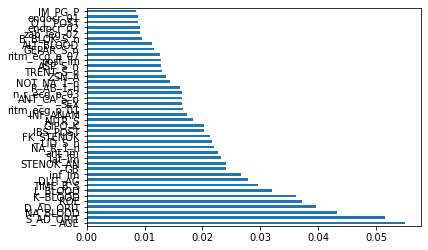

,Features,importances
0,AGE,0.055026
32,S_AD_ORIT,0.051560
81,NA_BLOOD,0.043196
33,D_AD_ORIT,0.039575
85,ROE,0.037245
...,...,...
15,nr_07,0.000000
48,ritm_ecg_p_06,0.000000
23,np_10,0.000000
38,GT_POST,0.000000


In [ ]:
model= RandomForestClassifier(n_estimators=100, random_state=22)
model.fit(X_Smote_train,Y_Smote_train.values.ravel())
importances=model.feature_importances_
feat_importances = pd.Series(model.feature_importances_, index=X_Smote_train.columns)
df_imp=pd.DataFrame({'Features':X_Smote_train.columns, 'importances':importances})
feat_importances.nlargest(40).plot(kind='barh')
plt.show()
df_imp.sort_values('importances',ascending = False)

In [ ]:
np.where(importances>0.015)

(array([ 0,  1,  2,  3,  4,  5,  6,  8, 32, 33, 40, 41, 42, 45, 53, 78, 79,
        81, 84, 85, 86, 87, 90, 91, 97, 99]),)

In [ ]:
X_Smote_train_rid = X_Smote_train.iloc[:, [0,  1,  2,  3,  4,  5,  6,  8, 32, 33, 40, 41, 42, 45, 53, 78, 79,
        81, 84, 85, 86, 87, 90, 91, 97, 99]]

In [ ]:
X_test_rid = X_compl_test.iloc[:, [0,  1,  2,  3,  4,  5,  6,  8, 32, 33, 40, 41, 42, 45, 53, 78, 79,
        81, 84, 85, 86, 87, 90, 91, 97, 99]]

In [ ]:
param = dict(n_estimators = [100], max_depth =range(5,10),  
             min_samples_split = range(2,30), 
            min_samples_leaf = range(2,20))
grid_search_cv = GridSearchCV(RandomForestClassifier(random_state=22), param, verbose=1, cv=5, n_jobs=-1)
grid_search_cv.fit(X_Smote_train_rid, Y_Smote_train)
print(grid_search_cv.best_params_)

In [ ]:
rf=RandomForestClassifier(max_depth= 9, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 100, random_state=22)
rf.fit(X_Smote_train_rid,Y_Smote_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=22, verbose=0,
                       warm_start=False)

In [ ]:
y_train_pred = rf.predict(X_Smote_train_rid)
print(classification_report(Y_Smote_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       387
           1       0.99      0.97      0.98       387
           2       1.00      1.00      1.00       387
           3       1.00      1.00      1.00       387
           4       0.99      1.00      1.00       387
           5       0.99      1.00      1.00       387
           6       1.00      1.00      1.00       387
           7       0.99      1.00      0.99       387
           8       0.98      1.00      0.99       387
           9       0.99      0.95      0.97       387
          10       1.00      1.00      1.00       387
          11       0.93      1.00      0.97       387

    accuracy                           0.99      4644
   macro avg       0.99      0.99      0.99      4644
weighted avg       0.99      0.99      0.99      4644



In [ ]:
y_test_pred = rf.predict(X_test_rid)
print(classification_report(Y_unica_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.66      0.52      0.58       162
           1       0.13      0.12      0.13        24
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         4
           4       0.25      0.57      0.35         7
           5       0.25      0.25      0.25         8
           6       0.06      0.11      0.07         9
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         8
           9       0.30      0.29      0.30        41
          10       0.00      0.00      0.00        10
          11       0.18      0.23      0.20        26

    accuracy                           0.37       304
   macro avg       0.15      0.18      0.16       304
weighted avg       0.43      0.37      0.40       304



### XGBoost SMOTE Y_UNICA

In [ ]:
XGBclassifier= xgboost.XGBClassifier(random_state=22)

In [ ]:
XGBclassifier.fit(X_Smote_train, Y_Smote_train.values.ravel())
importances=XGBclassifier.feature_importances_; importances

array([0.01216271, 0.01645413, 0.00811529, 0.00699984, 0.02026646,
       0.01415432, 0.00875365, 0.00408878, 0.00792781, 0.02113824,
       0.00708966, 0.        , 0.0028993 , 0.00987145, 0.01826074,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00396796, 0.00504681, 0.        , 0.00878594,
       0.00077272, 0.00313283, 0.01701116, 0.00646979, 0.00734391,
       0.01145832, 0.        , 0.01455361, 0.01123738, 0.03173918,
       0.00682148, 0.00382668, 0.        , 0.        , 0.        ,
       0.00929605, 0.0289219 , 0.01501177, 0.01123202, 0.05144789,
       0.01753824, 0.00689804, 0.0238729 , 0.        , 0.01176224,
       0.00380176, 0.01453636, 0.00940234, 0.03151761, 0.00724972,
       0.02249021, 0.01492344, 0.        , 0.        , 0.        ,
       0.        , 0.00631496, 0.        , 0.        , 0.00748839,
       0.00947133, 0.        , 0.00929099, 0.00921064, 0.01238689,
       0.00620212, 0.00294762, 0.00866419, 0.00576136, 0.     

In [ ]:
np.where(importances>0.01)

(array([  0,   1,   4,   5,   9,  14,  27,  30,  32,  33,  34,  41,  42,
         43,  44,  45,  47,  49,  51,  53,  55,  56,  69,  78,  79,  81,
         87,  90,  91,  95,  96,  97,  99, 100, 103]),)

In [ ]:
X_Smote_train_rid = X_Smote_train.iloc[:, [0,   1,   4,   5,   9,  14,  27,  30,  32,  33,  34,  41,  42,
         43,  44,  45,  47,  49,  51,  53,  55,  56,  69,  78,  79,  81,
         87,  90,  91,  95,  96,  97,  99, 100, 103]]

In [ ]:
X_test_rid = X_compl_test.iloc[:, [0,   1,   4,   5,   9,  14,  27,  30,  32,  33,  34,  41,  42,
         43,  44,  45,  47,  49,  51,  53,  55,  56,  69,  78,  79,  81,
         87,  90,  91,  95,  96,  97,  99, 100, 103]]

In [ ]:
XGBparams = dict(eta=[0.05, 0.10, 0.15, 0.20], gamma=[ 0.0, 0.1, 0.2 , 0.3],
                 max_depth=[ 3, 4, 5, 6, 8, 10], min_child_weight=[ 1, 3, 5],
                 colsample_bytree=[ 0.3, 0.4, 0.5])

In [ ]:
grid_search_XGB = GridSearchCV(XGBclassifier, XGBparams,verbose=1, cv=3, n_jobs=-1)
grid_search_XGB.fit(X_Smote_train_rid,Y_Smote_train.values.ravel())
print(grid_search_XGB.best_params_)

In [ ]:
XGBclassifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=0.0, eta=0.05,
       max_delta_step=0, max_depth=10, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softmax',num_class=12, random_state=22, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [ ]:
XGBclassifier.fit(X_Smote_train_rid,Y_Smote_train.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eta=0.05, gamma=0.0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, num_class=12, objective='multi:softprob',
              random_state=22, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1, verbosity=1)

In [ ]:
y_train_pred=XGBclassifier.predict(X_Smote_train_rid)
print(classification_report(Y_Smote_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       387
           1       1.00      1.00      1.00       387
           2       1.00      1.00      1.00       387
           3       1.00      1.00      1.00       387
           4       1.00      1.00      1.00       387
           5       1.00      1.00      1.00       387
           6       1.00      1.00      1.00       387
           7       1.00      1.00      1.00       387
           8       1.00      1.00      1.00       387
           9       1.00      1.00      1.00       387
          10       1.00      1.00      1.00       387
          11       1.00      1.00      1.00       387

    accuracy                           1.00      4644
   macro avg       1.00      1.00      1.00      4644
weighted avg       1.00      1.00      1.00      4644



In [ ]:
y_test_pred = XGBclassifier.predict(X_test_rid)
print(classification_report(Y_unica_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.59      0.78      0.67       162
           1       0.50      0.17      0.25        24
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         4
           4       0.33      0.29      0.31         7
           5       0.00      0.00      0.00         8
           6       0.17      0.11      0.13         9
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         8
           9       0.45      0.46      0.46        41
          10       0.20      0.10      0.13        10
          11       0.14      0.08      0.10        26

    accuracy                           0.51       304
   macro avg       0.20      0.17      0.17       304
weighted avg       0.45      0.51      0.46       304



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## Applicazione SMOTE manuale -classi quasi proporzionali-

In [ ]:
X_compl_train, X_compl_test, Y_unica_train, Y_unica_test = train_test_split(X_compl, Y_unica, test_size=0.3, random_state= 22)

In [ ]:
Y_unica_train.value_counts()

Y_unica
0          387
9          121
11          51
10          28
1           27
8           24
6           24
4           14
7           13
3            8
5            7
2            3
dtype: int64

In [ ]:
strategy = {0:387, 9:121, 11:70, 10:50, 1:50, 8:50, 6:50, 4:45, 7:45, 3:40, 5:40, 2:40}
oversample = SMOTE(k_neighbors=2, random_state=22, sampling_strategy=strategy)
X_Smote_train, Y_Smote_train = oversample.fit_resample(X_compl_train,Y_unica_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is dep

Class=9, n=121 (12.247%)
Class=0, n=387 (39.170%)
Class=10, n=50 (5.061%)
Class=5, n=40 (4.049%)
Class=4, n=45 (4.555%)
Class=8, n=50 (5.061%)
Class=3, n=40 (4.049%)
Class=6, n=50 (5.061%)
Class=1, n=50 (5.061%)
Class=7, n=45 (4.555%)
Class=11, n=70 (7.085%)
Class=2, n=40 (4.049%)


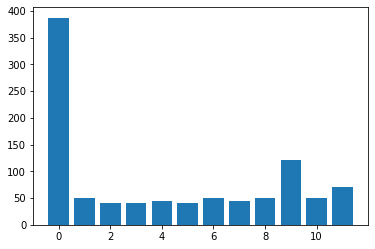

In [ ]:
counter = Counter(Y_Smote_train)
for k,v in counter.items():
	per = v / len(Y_Smote_train) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [ ]:
X_Smote_train=round(pd.DataFrame(X_Smote_train, columns=X_compl.columns),0); X_Smote_train

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,...,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
0,63.0,0.0,0.0,0.0,2.0,1.0,2.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,150.0,90.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,142.0,0.0,0.0,9.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,56.0,0.0,0.0,6.0,2.0,2.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,125.0,80.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,134.0,0.0,0.0,18.0,11.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,63.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,136.0,0.0,0.0,9.0,3.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
3,59.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,138.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,131.0,0.0,0.0,6.0,13.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,72.0,1.0,1.0,5.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,120.0,70.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,136.0,1.0,1.0,12.0,14.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,58.0,1.0,2.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,137.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,140.0,0.0,0.0,6.0,25.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
984,56.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,140.0,1.0,0.0,10.0,14.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
985,64.0,0.0,1.0,2.0,3.0,2.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,137.0,0.0,0.0,8.0,32.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
986,59.0,1.0,2.0,5.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,139.0,0.0,0.0,8.0,24.0,

In [ ]:
Y_Smote_train=pd.DataFrame(Y_Smote_train)

### Decision Tree SMOTE manuale Y_UNICA

#### Decision Tree SMOTE no balanced

Feature: 0, Score: 0.05410
Feature: 1, Score: 0.02022
Feature: 2, Score: 0.02480
Feature: 3, Score: 0.01745
Feature: 4, Score: 0.02600
Feature: 5, Score: 0.01720
Feature: 6, Score: 0.02313
Feature: 7, Score: 0.00072
Feature: 8, Score: 0.01988
Feature: 9, Score: 0.03120
Feature: 10, Score: 0.00607
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00412
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00914
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.01448
Feature: 25, Score: 0.00204
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.01129
Feature: 28, Score: 0.01025
Feature: 29, Score: 0.00293
Feature: 30, Score: 0.00231
Feature: 31, Score: 0.00286
Feature: 32, Score: 0.04523
Feature: 33, Score: 0.04334
Feature: 34, Score: 0.00435
Feature: 35, Score: 0.00202
Fe

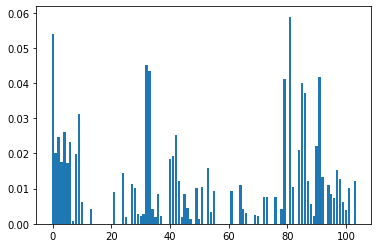

In [ ]:
model_imp = DecisionTreeClassifier(random_state=22)
model_imp.fit(X_Smote_train,Y_Smote_train)
importance = model_imp.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
np.where(importance>0.015)

(array([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 32, 33, 40, 41, 42, 53, 79, 81,
        84, 85, 86, 90, 91, 97]),)

In [ ]:
X_Smote_train_rid = X_Smote_train.iloc[:, [0,  1,  2,  3,  4,  5,  6,  8,  9, 32, 33, 40, 41, 42, 53, 79, 81,
        84, 85, 86, 90, 91, 97]]

In [ ]:
X_test_rid = X_compl_test.iloc[:, [0,  1,  2,  3,  4,  5,  6,  8,  9, 32, 33, 40, 41, 42, 53, 79, 81,
        84, 85, 86, 90, 91, 97]]

In [ ]:
class_tree=DecisionTreeClassifier(random_state=22)
param = {'max_depth':range(1, 6), 'min_samples_split':range(2,30), 'min_samples_leaf':range(2,25)} 
grid = GridSearchCV(class_tree, param, cv=5)
grid.fit(X_Smote_train_rid, Y_Smote_train)
print(grid.best_params_)

{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}


In [ ]:
mod_tree=DecisionTreeClassifier(max_depth=5,min_samples_split=2,min_samples_leaf=3,random_state=22)
mod_tree.fit(X_Smote_train_rid, Y_Smote_train)
text_representation = tree.export_text(mod_tree)
print(text_representation)

|--- feature_8 <= 0.50
|   |--- feature_20 <= 0.50
|   |   |--- feature_15 <= 3.50
|   |   |   |--- feature_21 <= 0.50
|   |   |   |   |--- feature_6 <= 2.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_6 >  2.50
|   |   |   |   |   |--- class: 9
|   |   |   |--- feature_21 >  0.50
|   |   |   |   |--- feature_4 <= 1.50
|   |   |   |   |   |--- class: 4
|   |   |   |   |--- feature_4 >  1.50
|   |   |   |   |   |--- class: 2
|   |   |--- feature_15 >  3.50
|   |   |   |--- feature_19 <= 8.50
|   |   |   |   |--- feature_13 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_13 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_19 >  8.50
|   |   |   |   |--- feature_21 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_21 >  0.50
|   |   |   |   |   |--- class: 8
|   |--- feature_20 >  0.50
|   |   |--- feature_16 <= 129.00
|   |   |   |--- feature_14 <= 0.50
|   |   |   |   |--- feature_15 <= 4.50
|   |   |   |  

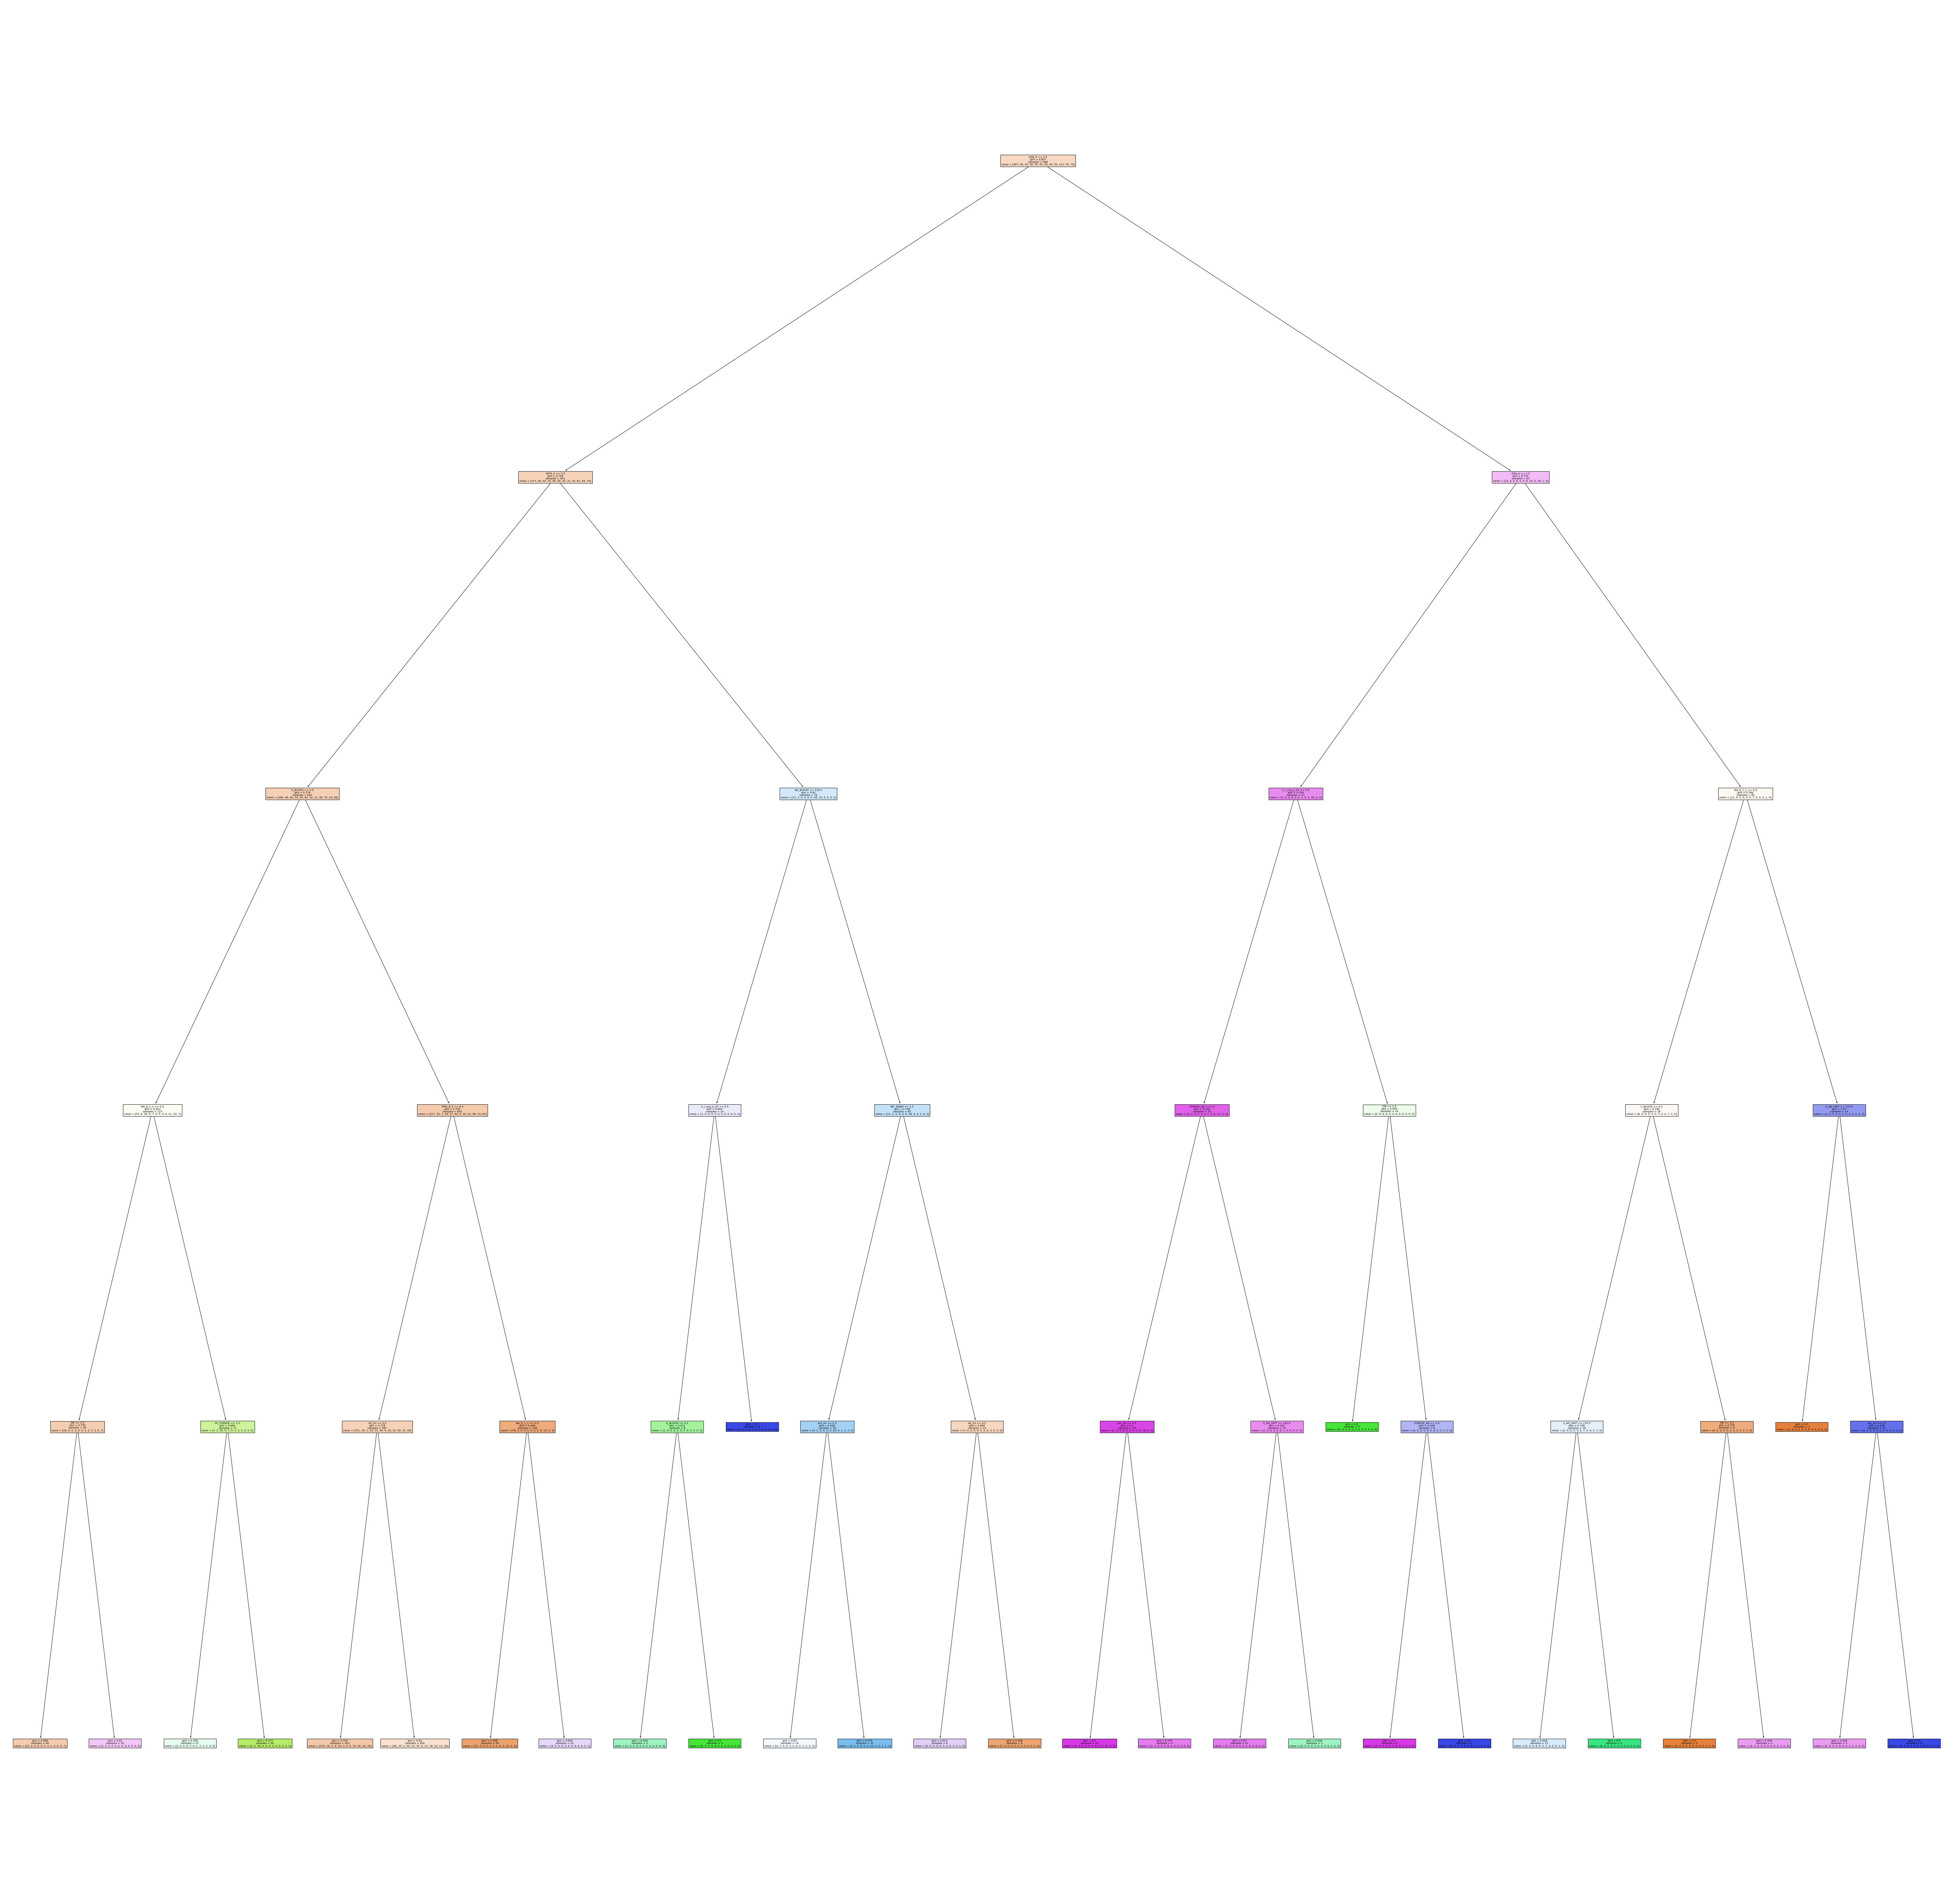

In [ ]:
fig1 = plt.figure(figsize=(100,100))
_ = tree.plot_tree(mod_tree,feature_names=list(X_Smote_train_rid.columns),filled=True)

In [ ]:
y_train_pred = mod_tree.predict(X_Smote_train_rid)
print(classification_report(Y_Smote_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.49      0.93      0.64       387
           1       0.00      0.00      0.00        50
           2       0.78      0.97      0.87        40
           3       1.00      0.28      0.43        40
           4       0.47      0.31      0.37        45
           5       0.00      0.00      0.00        40
           6       0.51      0.66      0.57        50
           7       1.00      0.42      0.59        45
           8       0.45      0.18      0.26        50
           9       0.78      0.31      0.45       121
          10       0.00      0.00      0.00        50
          11       0.00      0.00      0.00        70

    accuracy                           0.53       988
   macro avg       0.46      0.34      0.35       988
weighted avg       0.47      0.53      0.44       988



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
y_test_pred = mod_tree.predict(X_test_rid)
print(classification_report(Y_unica_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.60      0.88      0.72       162
           1       0.00      0.00      0.00        24
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         4
           4       0.25      0.29      0.27         7
           5       0.00      0.00      0.00         8
           6       0.10      0.22      0.13         9
           7       0.50      0.25      0.33         4
           8       0.00      0.00      0.00         8
           9       0.58      0.27      0.37        41
          10       0.00      0.00      0.00        10
          11       0.00      0.00      0.00        26

    accuracy                           0.52       304
   macro avg       0.17      0.16      0.15       304
weighted avg       0.41      0.52      0.45       304



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#### Decision Tree class_weight=balanced

Feature: 0, Score: 0.06700
Feature: 1, Score: 0.01853
Feature: 2, Score: 0.01739
Feature: 3, Score: 0.00293
Feature: 4, Score: 0.02837
Feature: 5, Score: 0.01864
Feature: 6, Score: 0.03525
Feature: 7, Score: 0.00243
Feature: 8, Score: 0.02100
Feature: 9, Score: 0.00968
Feature: 10, Score: 0.00231
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00242
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.01341
Feature: 25, Score: 0.01037
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.01737
Feature: 28, Score: 0.01143
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.05679
Feature: 33, Score: 0.02793
Feature: 34, Score: 0.00866
Feature: 35, Score: 0.00000
Fe

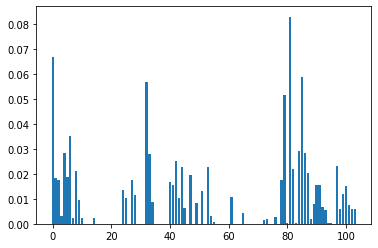

In [ ]:
model_imp = DecisionTreeClassifier(random_state=22, class_weight="balanced")
model_imp.fit(X_Smote_train,Y_Smote_train)
importance = model_imp.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
np.where(importance>0.015)

(array([  0,   1,   2,   4,   5,   6,   8,  27,  32,  33,  40,  41,  42,
         44,  47,  53,  78,  79,  81,  82,  84,  85,  86,  87,  90,  91,
         97, 100]),)

In [ ]:
X_Smote_train_rid = X_Smote_train.iloc[:, [ 0,   1,   2,   4,   5,   6,   8,  27,  32,  33,  40,  41,  42,
         44,  47,  53,  78,  79,  81,  82,  84,  85,  86,  87,  90,  91,
         97, 100]] 

In [ ]:
X_test_rid = X_compl_test.iloc[:, [ 0,   1,   2,   4,   5,   6,   8,  27,  32,  33,  40,  41,  42,
         44,  47,  53,  78,  79,  81,  82,  84,  85,  86,  87,  90,  91,
         97, 100]]

In [ ]:
class_tree=DecisionTreeClassifier(random_state=22, class_weight="balanced")
param = {'max_depth':range(1, 6), 'min_samples_split':range(2,30), 'min_samples_leaf':range(2,25)} 
grid = GridSearchCV(class_tree, param, cv=5)
grid.fit(X_Smote_train_rid, Y_Smote_train)
print(grid.best_params_)

In [ ]:
mod_tree=DecisionTreeClassifier(max_depth=5,min_samples_split=5,min_samples_leaf=2,random_state=22)
mod_tree.fit(X_Smote_train_rid, Y_Smote_train)
text_representation = tree.export_text(mod_tree)
print(text_representation)

|--- feature_24 <= 0.50
|   |--- feature_17 <= 3.50
|   |   |--- feature_25 <= 0.50
|   |   |   |--- feature_0 <= 77.50
|   |   |   |   |--- feature_8 <= 192.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_8 >  192.50
|   |   |   |   |   |--- class: 8
|   |   |   |--- feature_0 >  77.50
|   |   |   |   |--- feature_18 <= 135.50
|   |   |   |   |   |--- class: 6
|   |   |   |   |--- feature_18 >  135.50
|   |   |   |   |   |--- class: 10
|   |   |--- feature_25 >  0.50
|   |   |   |--- feature_3 <= 1.50
|   |   |   |   |--- feature_18 <= 131.50
|   |   |   |   |   |--- class: 4
|   |   |   |   |--- feature_18 >  131.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  1.50
|   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |--- class: 9
|   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |--- class: 2
|   |--- feature_17 >  3.50
|   |   |--- feature_12 <= 0.50
|   |   |   |--- feature_0 <= 62.50
|   |   |   |   |--- feature_13 <= 0.50
|   |

In [ ]:
y_train_pred = mod_tree.predict(X_Smote_train_rid)
print(classification_report(Y_Smote_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.47      0.95      0.63       387
           1       0.00      0.00      0.00        50
           2       0.87      0.97      0.92        40
           3       0.72      0.65      0.68        40
           4       0.84      0.36      0.50        45
           5       0.77      0.25      0.38        40
           6       0.55      0.64      0.59        50
           7       1.00      0.20      0.33        45
           8       0.45      0.10      0.16        50
           9       0.40      0.02      0.03       121
          10       0.75      0.06      0.11        50
          11       0.00      0.00      0.00        70

    accuracy                           0.52       988
   macro avg       0.57      0.35      0.36       988
weighted avg       0.50      0.52      0.41       988



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
y_test_pred = mod_tree.predict(X_test_rid)
print(classification_report(Y_unica_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.56      0.87      0.68       162
           1       0.00      0.00      0.00        24
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         4
           4       0.20      0.14      0.17         7
           5       0.00      0.00      0.00         8
           6       0.10      0.22      0.14         9
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         8
           9       0.17      0.02      0.04        41
          10       0.00      0.00      0.00        10
          11       0.00      0.00      0.00        26

    accuracy                           0.48       304
   macro avg       0.09      0.10      0.09       304
weighted avg       0.33      0.48      0.38       304



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### Random Forest SMOTE manuale Y_UNICA

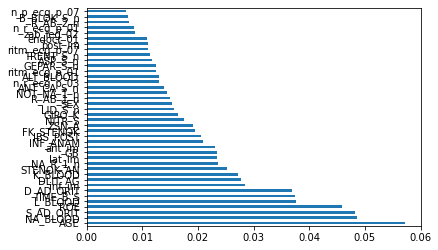

,Features,importances
0,AGE,0.057276
81,NA_BLOOD,0.048503
32,S_AD_ORIT,0.048266
85,ROE,0.045795
84,L_BLOOD,0.037634
...,...,...
23,np_10,0.000000
63,n_p_ecg_p_05,0.000000
17,np_01,0.000000
20,np_07,0.000000


In [ ]:
model= RandomForestClassifier(n_estimators=100, random_state=22)
model.fit(X_Smote_train,Y_Smote_train.values.ravel())
importances=model.feature_importances_
feat_importances = pd.Series(model.feature_importances_, index=X_Smote_train.columns)
df_imp=pd.DataFrame({'Features':X_Smote_train.columns, 'importances':importances})
feat_importances.nlargest(40).plot(kind='barh')
plt.show()
df_imp.sort_values('importances',ascending = False)

In [ ]:
np.where(importances>0.015)

(array([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 32, 33, 40, 41, 42, 78, 79, 81,
        84, 85, 86, 90, 91, 97]),)

In [ ]:
X_Smote_train_rid = X_Smote_train.iloc[:, [0,  1,  2,  3,  4,  5,  6,  8,  9, 32, 33, 40, 41, 42, 78, 79, 81,
        84, 85, 86, 90, 91, 97]]

In [ ]:
X_test_rid = X_compl_test.iloc[:, [0,  1,  2,  3,  4,  5,  6,  8,  9, 32, 33, 40, 41, 42, 78, 79, 81,
        84, 85, 86, 90, 91, 97]]

In [ ]:
param = dict(n_estimators = [100], max_depth =range(5,10),  
             min_samples_split = range(2,30), 
            min_samples_leaf = range(2,20))
grid_search_cv = GridSearchCV(RandomForestClassifier(random_state=22), param, verbose=1, cv=5, n_jobs=-1)
grid_search_cv.fit(X_Smote_train_rid, Y_Smote_train)
print(grid_search_cv.best_params_)

In [ ]:
rf=RandomForestClassifier(max_depth= 9, min_samples_leaf= 2, min_samples_split= 2, n_estimators= 100, random_state=22)
rf.fit(X_Smote_train_rid,Y_Smote_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=22, verbose=0,
                       warm_start=False)

In [ ]:
y_train_pred = rf.predict(X_Smote_train_rid)
print(classification_report(Y_Smote_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.66      1.00      0.80       387
           1       1.00      0.46      0.63        50
           2       1.00      0.97      0.99        40
           3       1.00      0.90      0.95        40
           4       1.00      0.93      0.97        45
           5       1.00      0.85      0.92        40
           6       0.98      0.86      0.91        50
           7       1.00      0.96      0.98        45
           8       1.00      0.54      0.70        50
           9       1.00      0.53      0.69       121
          10       1.00      0.60      0.75        50
          11       1.00      0.29      0.44        70

    accuracy                           0.80       988
   macro avg       0.97      0.74      0.81       988
weighted avg       0.87      0.80      0.78       988



In [ ]:
y_test_pred = rf.predict(X_test_rid)
print(classification_report(Y_unica_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.58      0.98      0.73       162
           1       0.00      0.00      0.00        24
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         8
           6       0.20      0.11      0.14         9
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         8
           9       0.62      0.32      0.42        41
          10       0.00      0.00      0.00        10
          11       0.00      0.00      0.00        26

    accuracy                           0.57       304
   macro avg       0.12      0.12      0.11       304
weighted avg       0.40      0.57      0.45       304



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### XGBoost SMOTE manuale Y_UNICA

In [ ]:
XGBclassifier= xgboost.XGBClassifier(random_state=22)

In [ ]:
XGBclassifier.fit(X_Smote_train, Y_Smote_train.values.ravel())
importances=XGBclassifier.feature_importances_; importances

array([0.01365081, 0.01109272, 0.00904762, 0.00879019, 0.01514282,
       0.00883868, 0.01213333, 0.01029106, 0.00838053, 0.02890153,
       0.00540456, 0.        , 0.00412846, 0.0125255 , 0.04643871,
       0.        , 0.        , 0.        , 0.        , 0.00840993,
       0.        , 0.01309028, 0.        , 0.        , 0.01330107,
       0.00346767, 0.        , 0.01065265, 0.01461227, 0.00682954,
       0.        , 0.01067316, 0.0124923 , 0.0145635 , 0.01883856,
       0.        , 0.01489943, 0.        , 0.        , 0.00764774,
       0.01257867, 0.01808485, 0.01337728, 0.01074359, 0.02836751,
       0.00721015, 0.00950734, 0.01826329, 0.        , 0.01088087,
       0.00675682, 0.01548547, 0.        , 0.02956561, 0.00512071,
       0.02100132, 0.01998866, 0.01298547, 0.        , 0.        ,
       0.        , 0.00831599, 0.        , 0.        , 0.00362146,
       0.00917166, 0.00393986, 0.0029606 , 0.01287025, 0.01597696,
       0.0122532 , 0.00498356, 0.01778754, 0.01317254, 0.     

In [ ]:
np.where(importances>0.012)

(array([ 0,  4,  6,  9, 13, 14, 21, 24, 28, 32, 33, 34, 36, 40, 41, 42, 44,
        47, 51, 53, 55, 56, 57, 68, 69, 70, 72, 73, 78, 79, 86, 89, 90, 91,
        97]),)

In [ ]:
X_Smote_train_rid = X_Smote_train.iloc[:, [0,  4,  6,  9, 13, 14, 21, 24, 28, 32, 33, 34, 36, 40, 41, 42, 44,
        47, 51, 53, 55, 56, 57, 68, 69, 70, 72, 73, 78, 79, 86, 89, 90, 91,
        97]] 

In [ ]:
X_test_rid = X_compl_test.iloc[:, [0,  4,  6,  9, 13, 14, 21, 24, 28, 32, 33, 34, 36, 40, 41, 42, 44,
        47, 51, 53, 55, 56, 57, 68, 69, 70, 72, 73, 78, 79, 86, 89, 90, 91,
        97]]

In [ ]:
XGBparams = dict(eta=[0.05, 0.10, 0.15, 0.20], gamma=[ 0.0, 0.1, 0.2 , 0.3],
                 max_depth=[ 3, 4, 5, 6, 8, 10], min_child_weight=[ 1, 3, 5],
                 colsample_bytree=[ 0.3, 0.4, 0.5])

In [ ]:
grid_search_XGB = GridSearchCV(XGBclassifier, XGBparams,verbose=1, cv=3, n_jobs=-1)
grid_search_XGB.fit(X_Smote_train_rid,Y_Smote_train.values.ravel())
print(grid_search_XGB.best_params_)

In [ ]:
XGBclassifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=0.1, eta=0.05,
       max_delta_step=0, max_depth=10, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softmax',num_class=12, random_state=22, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [ ]:
XGBclassifier.fit(X_Smote_train_rid,Y_Smote_train.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eta=0.05, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, num_class=12, objective='multi:softprob',
              random_state=22, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1, verbosity=1)

In [ ]:
y_train_pred=XGBclassifier.predict(X_Smote_train_rid)
print(classification_report(Y_Smote_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       387
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        40
           4       1.00      1.00      1.00        45
           5       1.00      1.00      1.00        40
           6       1.00      1.00      1.00        50
           7       1.00      1.00      1.00        45
           8       1.00      1.00      1.00        50
           9       1.00      1.00      1.00       121
          10       1.00      1.00      1.00        50
          11       1.00      1.00      1.00        70

    accuracy                           1.00       988
   macro avg       1.00      1.00      1.00       988
weighted avg       1.00      1.00      1.00       988



In [ ]:
y_test_pred = XGBclassifier.predict(X_test_rid)
print(classification_report(Y_unica_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.57      0.85      0.69       162
           1       0.50      0.08      0.14        24
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         7
           5       1.00      0.12      0.22         8
           6       0.17      0.11      0.13         9
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         8
           9       0.43      0.39      0.41        41
          10       0.00      0.00      0.00        10
          11       0.10      0.04      0.06        26

    accuracy                           0.52       304
   macro avg       0.23      0.13      0.14       304
weighted avg       0.44      0.52      0.45       304



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# Metodologie ad albero per variabili dummy

##ZSN

### Decision Tree con ZSN

In [ ]:
X_train, X_test, Y_ZSN_train, Y_ZSN_test = train_test_split(X, ZSN, test_size=0.3, random_state= 22)

Feature: 0, Score: 0.09743
Feature: 1, Score: 0.00649
Feature: 2, Score: 0.01741
Feature: 3, Score: 0.00350
Feature: 4, Score: 0.00865
Feature: 5, Score: 0.01295
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00296
Feature: 8, Score: 0.01676
Feature: 9, Score: 0.10657
Feature: 10, Score: 0.00263
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00297
Feature: 13, Score: 0.00300
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00299
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00250
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.02228
Feature: 28, Score: 0.02071
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.02571
Feature: 33, Score: 0.01522
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00252
Fe

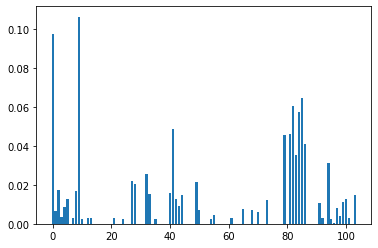

In [ ]:
model_imp = DecisionTreeClassifier(random_state=22, class_weight="balanced")
model_imp.fit(X_train, Y_ZSN_train)
importance = model_imp.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
np.where(importance>0.015)

(array([ 0,  2,  8,  9, 27, 28, 32, 33, 40, 41, 49, 79, 81, 82, 83, 84, 85,
        86, 94]),)

In [ ]:
X_train_rid = X_train.iloc[:, [ 0,  2,  8,  9, 27, 28, 32, 33, 40, 41, 49, 79, 81, 82, 83, 84, 85,
        86, 94]]

In [ ]:
X_test_rid = X_test.iloc[:, [ 0,  2,  8,  9, 27, 28, 32, 33, 40, 41, 49, 79, 81, 82, 83, 84, 85,
        86, 94]]

In [ ]:
class_tree=DecisionTreeClassifier(random_state=22, class_weight="balanced")
param = {'max_depth':range(1, 6), 'min_samples_split':range(2,20), 'min_samples_leaf':range(2,15)} 
grid = GridSearchCV(class_tree, param, cv=5)
grid.fit(X_train_rid, Y_ZSN_train)
print(grid.best_params_)

In [ ]:
mod_tree=DecisionTreeClassifier(max_depth=1,min_samples_split=2,min_samples_leaf=2,random_state=22)
mod_tree.fit(X_train_rid, Y_ZSN_train)
text_representation = tree.export_text(mod_tree)
print(text_representation)

|--- feature_3 <= 0.50
|   |--- class: 0
|--- feature_3 >  0.50
|   |--- class: 1



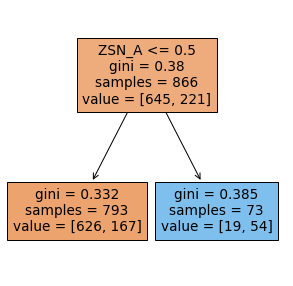

In [ ]:
fig1 = plt.figure(figsize=(5,5))
_ = tree.plot_tree(mod_tree,feature_names=list(X_train_rid.columns),filled=True)

In [ ]:
y_train_pred = mod_tree.predict(X_train_rid)
print(classification_report(Y_ZSN_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87       645
           1       0.74      0.24      0.37       221

    accuracy                           0.79       866
   macro avg       0.76      0.61      0.62       866
weighted avg       0.78      0.79      0.74       866



In [ ]:
y_test_pred = mod_tree.predict(X_test_rid)
print(classification_report(Y_ZSN_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       283
           1       0.62      0.29      0.40        89

    accuracy                           0.79       372
   macro avg       0.71      0.62      0.63       372
weighted avg       0.76      0.79      0.76       372



###Random Forest con ZSN

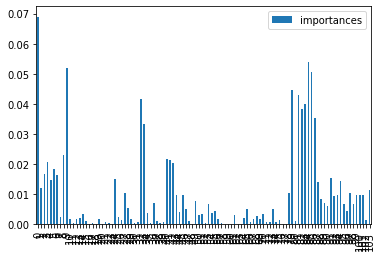

In [ ]:
model= RandomForestClassifier(n_estimators=100, random_state=22, class_weight="balanced")
model.fit(X_train, Y_ZSN_train.values.ravel())
importances=model.feature_importances_
df_imp=pd.DataFrame({'Features':X_train.columns, 'importances':importances})
df_imp.plot(kind='bar')

In [ ]:
np.where(importances > 0.015)

(array([ 0,  2,  3,  5,  6,  8,  9, 32, 33, 40, 41, 42, 79, 81, 82, 83, 84,
        85, 86, 91]),)

In [ ]:
X_train_rid = X_train.iloc[:, [0,  2,  3,  5,  6,  8,  9, 32, 33, 40, 41, 42, 79, 81, 82, 83, 84,
        85, 86, 91]]

In [ ]:
X_test_rid = X_test.iloc[:, [ 0,  2,  3,  5,  6,  8,  9, 32, 33, 40, 41, 42, 79, 81, 82, 83, 84,
        85, 86, 91]]

In [ ]:
param = dict(n_estimators = [100], max_depth =range(5,10),  
             min_samples_split = range(2,20), 
            min_samples_leaf = range(2,15))
grid_search_cv = GridSearchCV(RandomForestClassifier(random_state=22, class_weight= "balanced"), param, verbose=1, cv=5, n_jobs=-1)
grid_search_cv.fit(X_train_rid, Y_ZSN_train)
print(grid_search_cv.best_params_)

In [ ]:
rf=RandomForestClassifier(max_depth= 9, min_samples_leaf= 2, min_samples_split= 2, n_estimators= 100, random_state=22, class_weight="balanced")
rf.fit(X_train_rid,Y_ZSN_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=22, verbose=0,
                       warm_start=False)

In [ ]:
y_train_pred = rf.predict(X_train_rid)
print(classification_report(Y_ZSN_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       645
           1       0.98      0.86      0.92       221

    accuracy                           0.96       866
   macro avg       0.97      0.93      0.94       866
weighted avg       0.96      0.96      0.96       866



In [ ]:
y_test_pred = rf.predict(X_test_rid) 
print(classification_report(Y_ZSN_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       283
           1       0.52      0.31      0.39        89

    accuracy                           0.77       372
   macro avg       0.66      0.61      0.62       372
weighted avg       0.74      0.77      0.74       372



###XGBoost con ZSN

#### XGBoost ZSN no scale_pos_weight

In [ ]:
XGBclassifier= xgboost.XGBClassifier(random_state=22)

In [ ]:
XGBclassifier.fit(X_train, Y_ZSN_train.values.ravel())
importances=XGBclassifier.feature_importances_; importances

array([0.02133227, 0.01831536, 0.01632814, 0.00821935, 0.01200211,
       0.01661956, 0.0179315 , 0.        , 0.010719  , 0.07095136,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.0245152 ,
       0.        , 0.00654673, 0.02090024, 0.01621244, 0.        ,
       0.        , 0.        , 0.01729964, 0.025466  , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01947381, 0.03103448, 0.01440734, 0.0346145 , 0.02333901,
       0.01604574, 0.02714151, 0.        , 0.        , 0.01886442,
       0.        , 0.        , 0.        , 0.02773359, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00588316, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01693499, 0.        , 0.        , 0.01194579, 0.     

In [ ]:
np.where(importances>0.02)

(array([  0,   9,  24,  27,  33,  41,  43,  44,  46,  53,  78,  85,  87,
         91,  92,  93,  97,  98, 101]),)

In [ ]:
X_train_rid = X_train.iloc[:, [  0,   9,  24,  27,  33,  41,  43,  44,  46,  53,  78,  85,  87,
         91,  92,  93,  97,  98, 101]]

In [ ]:
X_test_rid = X_test.iloc[:, [  0,   9,  24,  27,  33,  41,  43,  44,  46,  53,  78,  85,  87,
         91,  92,  93,  97,  98, 101]]

In [ ]:
XGBparams = dict(eta=[0.05, 0.10, 0.15, 0.20], gamma=[ 0.0, 0.1, 0.2 , 0.3],
                 max_depth=[ 3, 4, 5, 6, 8, 10], min_child_weight=[ 1, 3, 5],
                 colsample_bytree=[ 0.3, 0.4, 0.5])

In [ ]:
grid_search_XGB = GridSearchCV(XGBclassifier, XGBparams,verbose=1, cv=3, n_jobs=-1)
grid_search_XGB.fit(X_train_rid,Y_ZSN_train.values.ravel())
print(grid_search_XGB.best_params_)

In [ ]:
XGBclassifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=0.2, eta=0.05,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softmax',num_class=12, random_state=22, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [ ]:
XGBclassifier.fit(X_train_rid,Y_ZSN_train.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eta=0.05, gamma=0.2,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, num_class=12, objective='multi:softmax',
              random_state=22, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1, verbosity=1)

In [ ]:
y_train_pred=XGBclassifier.predict(X_train_rid)
print(classification_report(Y_ZSN_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       645
           1       0.98      0.63      0.77       221

    accuracy                           0.90       866
   macro avg       0.93      0.81      0.85       866
weighted avg       0.91      0.90      0.89       866



In [ ]:
y_test_pred = XGBclassifier.predict(X_test_rid)
print(classification_report(Y_ZSN_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       283
           1       0.59      0.34      0.43        89

    accuracy                           0.78       372
   macro avg       0.70      0.63      0.65       372
weighted avg       0.76      0.78      0.76       372



#### XGBoost ZSN con scale_pos_weight

In [ ]:
ZSN.value_counts()

ZSN
0      928
1      310
dtype: int64

In [ ]:
928/310

2.9935483870967743

In [ ]:
XGBclassifier= xgboost.XGBClassifier(random_state=22, scale_pos_weight=2.99)

In [ ]:
XGBclassifier.fit(X_train, Y_ZSN_train.values.ravel())
importances=XGBclassifier.feature_importances_; importances

array([0.0286349 , 0.02150361, 0.01168879, 0.0096988 , 0.01203727,
       0.0130769 , 0.01917776, 0.        , 0.00993839, 0.0585805 ,
       0.00817009, 0.        , 0.        , 0.00755962, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.02202602,
       0.        , 0.00851241, 0.02865646, 0.01481477, 0.        ,
       0.        , 0.        , 0.0157179 , 0.01878727, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02388814, 0.03524816, 0.01825587, 0.        , 0.03152246,
       0.00401646, 0.02723885, 0.        , 0.        , 0.02816967,
       0.        , 0.        , 0.        , 0.0419072 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00694072, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00796914, 0.        , 0.        ,
       0.01661961, 0.        , 0.        , 0.0114714 , 0.     

In [ ]:
np.where(importances>0.02)

(array([ 0,  1,  9, 24, 27, 40, 41, 44, 46, 49, 53, 85, 86, 89, 91, 92, 93,
        98, 99]),)

In [ ]:
X_train_rid = X_train.iloc[:, [  0,  1,  9, 24, 27, 40, 41, 44, 46, 49, 53, 85, 86, 89, 91, 92, 93,
        98, 99]]

In [ ]:
X_test_rid = X_test.iloc[:, [  0,  1,  9, 24, 27, 40, 41, 44, 46, 49, 53, 85, 86, 89, 91, 92, 93,
        98, 99]]

In [ ]:
XGBparams = dict(eta=[0.05, 0.10, 0.15, 0.20], gamma=[ 0.0, 0.1, 0.2 , 0.3],
                 max_depth=[ 3, 4, 5, 6, 8, 10], min_child_weight=[ 1, 3, 5],
                 colsample_bytree=[ 0.3, 0.4, 0.5])

In [ ]:
grid_search_XGB = GridSearchCV(XGBclassifier, XGBparams,verbose=1, cv=3, n_jobs=-1)
grid_search_XGB.fit(X_train_rid,Y_ZSN_train.values.ravel())
print(grid_search_XGB.best_params_)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 370 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 870 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done 1570 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2470 tasks      | elapsed:  2.0min


{'colsample_bytree': 0.4, 'eta': 0.05, 'gamma': 0.0, 'max_depth': 8, 'min_child_weight': 1}


[Parallel(n_jobs=-1)]: Done 2592 out of 2592 | elapsed:  2.1min finished


In [ ]:
XGBclassifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=0.0, eta=0.05,
       max_delta_step=0, max_depth=8, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softmax',num_class=12, random_state=22, reg_alpha=0,
       reg_lambda=1, scale_pos_weight= 2.99, seed=None, silent=True,
       subsample=1)

In [ ]:
XGBclassifier.fit(X_train_rid,Y_ZSN_train.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eta=0.05, gamma=0.0,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, num_class=12, objective='multi:softmax',
              random_state=22, reg_alpha=0, reg_lambda=1, scale_pos_weight=2.99,
              seed=None, silent=True, subsample=1, verbosity=1)

In [ ]:
y_train_pred=XGBclassifier.predict(X_train_rid)
print(classification_report(Y_ZSN_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       645
           1       1.00      0.86      0.92       221

    accuracy                           0.96       866
   macro avg       0.98      0.93      0.95       866
weighted avg       0.96      0.96      0.96       866



In [ ]:
y_test_pred = XGBclassifier.predict(X_test_rid)
print(classification_report(Y_ZSN_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       283
           1       0.55      0.31      0.40        89

    accuracy                           0.77       372
   macro avg       0.68      0.62      0.63       372
weighted avg       0.75      0.77      0.75       372



## SURVIVE

###Decision Tree con SURVIVE

In [ ]:
survive=Survive.astype('category')

In [ ]:
X_train, X_test, Y_survive_train, Y_survive_test = train_test_split(X, survive, test_size=0.3, random_state= 22)

Feature: 0, Score: 0.19287
Feature: 1, Score: 0.00692
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00422
Feature: 4, Score: 0.05587
Feature: 5, Score: 0.03395
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00436
Feature: 8, Score: 0.01414
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00972
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00842
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.09531
Feature: 33, Score: 0.01061
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

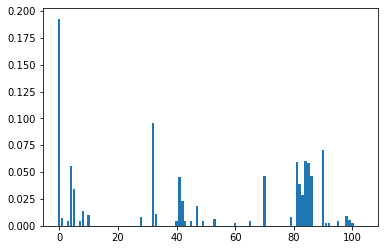

In [ ]:
model_imp = DecisionTreeClassifier(random_state=22, class_weight="balanced")
model_imp.fit(X_train, Y_survive_train)
importance = model_imp.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
np.where(importance>0.015)

(array([ 0,  4,  5, 32, 41, 42, 47, 70, 81, 82, 83, 84, 85, 86, 90]),)

In [ ]:
X_train_rid = X_train.iloc[:, [0,  4,  5, 32, 41, 42, 47, 70, 81, 82, 83, 84, 85, 86, 90]]

In [ ]:
X_test_rid = X_test.iloc[:, [0,  4,  5, 32, 41, 42, 47, 70, 81, 82, 83, 84, 85, 86, 90]]

In [ ]:
class_tree=DecisionTreeClassifier(random_state=22, class_weight="balanced")
param = {'max_depth':range(1, 6), 'min_samples_split':range(2,20), 'min_samples_leaf':range(2,15)} 
grid = GridSearchCV(class_tree, param, cv=5)
grid.fit(X_train_rid, Y_survive_train)
print(grid.best_params_)

In [ ]:
mod_tree=DecisionTreeClassifier(max_depth=3,min_samples_split=2,min_samples_leaf=2,random_state=22, class_weight="balanced")
mod_tree.fit(X_train_rid, Y_survive_train)
text_representation = tree.export_text(mod_tree)
print(text_representation)

|--- feature_0 <= 62.50
|   |--- feature_1 <= 2.50
|   |   |--- feature_7 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_7 >  0.50
|   |   |   |--- class: 0
|   |--- feature_1 >  2.50
|   |   |--- feature_8 <= 136.50
|   |   |   |--- class: 0
|   |   |--- feature_8 >  136.50
|   |   |   |--- class: 1
|--- feature_0 >  62.50
|   |--- feature_14 <= 0.50
|   |   |--- feature_3 <= 112.50
|   |   |   |--- class: 0
|   |   |--- feature_3 >  112.50
|   |   |   |--- class: 1
|   |--- feature_14 >  0.50
|   |   |--- feature_9 <= 0.19
|   |   |   |--- class: 1
|   |   |--- feature_9 >  0.19
|   |   |   |--- class: 0



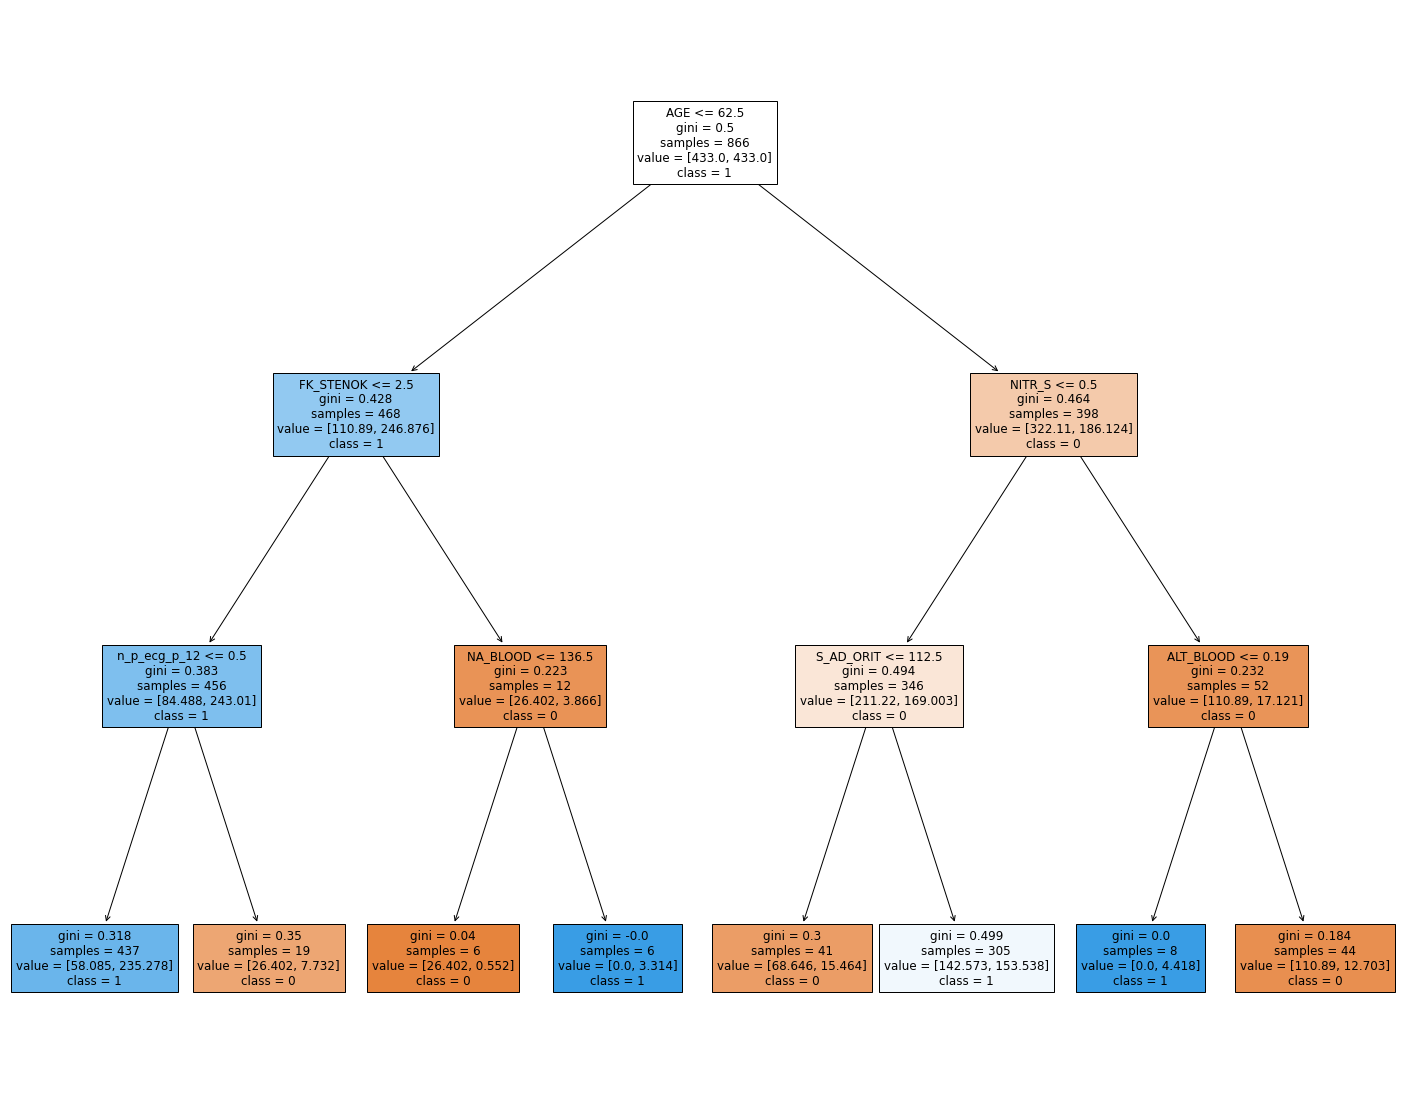

In [ ]:
fig1 = plt.figure(figsize=(25,20))
_ = tree.plot_tree(mod_tree,feature_names=list(X_train_rid.columns), class_names=['0', '1'],filled=True)

In [ ]:
y_train_pred = mod_tree.predict(X_train_rid)
print(classification_report(Y_survive_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.40      0.54      0.46        82
           1       0.95      0.92      0.93       784

    accuracy                           0.88       866
   macro avg       0.67      0.73      0.70       866
weighted avg       0.90      0.88      0.89       866



In [ ]:
y_test_pred = mod_tree.predict(X_test_rid)
print(classification_report(Y_survive_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.35      0.41      0.38        41
           1       0.93      0.90      0.91       331

    accuracy                           0.85       372
   macro avg       0.64      0.66      0.65       372
weighted avg       0.86      0.85      0.86       372



###Random Forest con SURVIVE





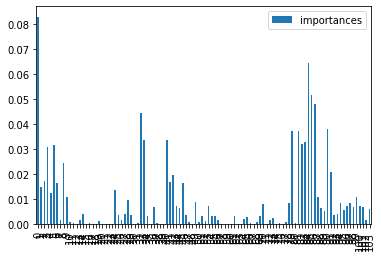

In [ ]:
model= RandomForestClassifier(n_estimators=100, random_state=22, class_weight="balanced")
model.fit(X_train, Y_survive_train.values.ravel())
importances=model.feature_importances_
df_imp=pd.DataFrame({'Features':X_train.columns, 'importances':importances})
df_imp.plot(kind='bar')

In [ ]:
np.where(importances > 0.015)

(array([ 0,  2,  3,  5,  6,  8, 32, 33, 40, 41, 42, 45, 79, 81, 82, 83, 84,
        85, 86, 90, 91]),)

In [ ]:
X_train_rid = X_train.iloc[:, [0,  2,  3,  5,  6,  8, 32, 33, 40, 41, 42, 45, 79, 81, 82, 83, 84,
        85, 86, 90, 91]]

In [ ]:
X_test_rid = X_test.iloc[:, [ 0,  2,  3,  5,  6,  8, 32, 33, 40, 41, 42, 45, 79, 81, 82, 83, 84,
        85, 86, 90, 91]]

In [ ]:
param = dict(n_estimators = [100], max_depth =range(5,10),  
             min_samples_split = range(2,20), 
            min_samples_leaf = range(2,15))
grid_search_cv = GridSearchCV(RandomForestClassifier(random_state=22, class_weight= "balanced"), param, verbose=1, cv=5, n_jobs=-1)
grid_search_cv.fit(X_train_rid, Y_survive_train)
print(grid_search_cv.best_params_)

In [ ]:
rf=RandomForestClassifier(max_depth= 7, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 100, random_state=22, class_weight="balanced")
rf.fit(X_train_rid,Y_survive_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=22, verbose=0,
                       warm_start=False)

In [ ]:
y_train_pred = rf.predict(X_train_rid)
print(classification_report(Y_survive_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        82
           1       1.00      1.00      1.00       784

    accuracy                           1.00       866
   macro avg       0.99      0.99      0.99       866
weighted avg       1.00      1.00      1.00       866



In [ ]:
y_test_pred = rf.predict(X_test_rid)
print(classification_report(Y_survive_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.64      0.17      0.27        41
           1       0.91      0.99      0.95       331

    accuracy                           0.90       372
   macro avg       0.77      0.58      0.61       372
weighted avg       0.88      0.90      0.87       372



###XGBoost con Survive

#### XGBoost Survive no scale_pos_weight

In [ ]:
XGBclassifier= xgboost.XGBClassifier(random_state=22)

In [ ]:
XGBclassifier.fit(X_train, Y_survive_train.values.ravel())
importances=XGBclassifier.feature_importances_; importances

array([0.02334884, 0.        , 0.01341906, 0.02349494, 0.03113164,
       0.02293612, 0.0166065 , 0.        , 0.02439662, 0.02838599,
       0.        , 0.        , 0.        , 0.        , 0.01220838,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.02858714,
       0.00965421, 0.        , 0.        , 0.01903476, 0.        ,
       0.        , 0.        , 0.02006348, 0.01559797, 0.        ,
       0.        , 0.01218335, 0.        , 0.        , 0.        ,
       0.02486059, 0.05297785, 0.01642166, 0.01295859, 0.02959797,
       0.03432737, 0.01226811, 0.        , 0.        , 0.01429198,
       0.        , 0.        , 0.        , 0.01639168, 0.04903285,
       0.04080963, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02055074, 0.        , 0.        , 0.        , 0.     

In [ ]:
np.where(importances>0.015)

(array([  0,   3,   4,   5,   6,   8,   9,  24,  28,  32,  33,  40,  41,
         42,  44,  45,  53,  54,  55,  70,  79,  81,  83,  84,  85,  86,
         90,  91,  93,  96,  98, 103]),)

In [ ]:
X_train_rid = X_train.iloc[:, [ 0,   3,   4,   5,   6,   8,   9,  24,  28,  32,  33,  40,  41,
         42,  44,  45,  53,  54,  55,  70,  79,  81,  83,  84,  85,  86,
         90,  91,  93,  96,  98, 103]]

In [ ]:
X_test_rid = X_test.iloc[:, [ 0,   3,   4,   5,   6,   8,   9,  24,  28,  32,  33,  40,  41,
         42,  44,  45,  53,  54,  55,  70,  79,  81,  83,  84,  85,  86,
         90,  91,  93,  96,  98, 103]]

In [ ]:
XGBparams = dict(eta=[0.05, 0.10, 0.15, 0.20], gamma=[ 0.0, 0.1, 0.2 , 0.3],
                 max_depth=[ 3, 4, 5, 6, 8, 10], min_child_weight=[ 1, 3, 5],
                 colsample_bytree=[ 0.3, 0.4, 0.5])

In [ ]:
grid_search_XGB = GridSearchCV(XGBclassifier, XGBparams,verbose=1, cv=5, n_jobs=-1)
grid_search_XGB.fit(X_train_rid,Y_survive_train.values.ravel())
print(grid_search_XGB.best_params_)

In [ ]:
XGBclassifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=0.1, eta=0.05,
       max_delta_step=0, max_depth=6, min_child_weight=5, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softmax',num_class=12, random_state=22, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [ ]:
XGBclassifier.fit(X_train_rid,Y_survive_train.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eta=0.05, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, num_class=12, objective='multi:softmax',
              random_state=22, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1, verbosity=1)

In [ ]:
y_train_pred=XGBclassifier.predict(X_train_rid)
print(classification_report(Y_survive_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.96        82
           1       0.99      1.00      1.00       784

    accuracy                           0.99       866
   macro avg       1.00      0.96      0.98       866
weighted avg       0.99      0.99      0.99       866



In [ ]:
y_test_pred = XGBclassifier.predict(X_test_rid)
print(classification_report(Y_survive_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.69      0.22      0.33        41
           1       0.91      0.99      0.95       331

    accuracy                           0.90       372
   macro avg       0.80      0.60      0.64       372
weighted avg       0.89      0.90      0.88       372



#### XGBoost Survive scale_pos_weight

In [ ]:
survive.value_counts()

Survive
1          1115
0           123
dtype: int64

In [ ]:
123/1115

0.11031390134529148

In [ ]:
XGBclassifier= xgboost.XGBClassifier(random_state=22, scale_pos_weight=0.11)

In [ ]:
XGBclassifier.fit(X_train, Y_survive_train.values.ravel())
importances=XGBclassifier.feature_importances_; importances

array([0.04860471, 0.0276039 , 0.0140672 , 0.03377051, 0.05151771,
       0.03895574, 0.01935752, 0.        , 0.04291257, 0.02749557,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.05541216,
       0.01115055, 0.        , 0.        , 0.01337068, 0.        ,
       0.        , 0.        , 0.03584627, 0.01331529, 0.        ,
       0.        , 0.00942114, 0.        , 0.        , 0.        ,
       0.03093303, 0.02777893, 0.01824792, 0.00822951, 0.        ,
       0.04359582, 0.00970775, 0.        , 0.        , 0.01785263,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02525361, 0.        , 0.        , 0.        , 0.     

In [ ]:
np.where(importances>0.015)

(array([ 0,  1,  3,  4,  5,  6,  8,  9, 24, 32, 40, 41, 42, 45, 49, 70, 79,
        81, 83, 84, 85, 86, 90, 91, 99]),)

In [ ]:
X_train_rid = X_train.iloc[:, [ 0,  1,  3,  4,  5,  6,  8,  9, 24, 32, 40, 41, 42, 45, 49, 70, 79,
        81, 83, 84, 85, 86, 90, 91, 99]]

In [ ]:
X_test_rid = X_test.iloc[:, [0,  1,  3,  4,  5,  6,  8,  9, 24, 32, 40, 41, 42, 45, 49, 70, 79,
        81, 83, 84, 85, 86, 90, 91, 99]]

In [ ]:
XGBparams = dict(eta=[0.05, 0.10, 0.15, 0.20], gamma=[ 0.0, 0.1, 0.2 , 0.3],
                 max_depth=[ 3, 4, 5, 6, 8, 10], min_child_weight=[ 1, 3, 5],
                 colsample_bytree=[ 0.3, 0.4, 0.5])

In [ ]:
grid_search_XGB = GridSearchCV(XGBclassifier, XGBparams,verbose=1, cv=5, n_jobs=-1)
grid_search_XGB.fit(X_train_rid,Y_survive_train.values.ravel())
print(grid_search_XGB.best_params_)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done 1588 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2488 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 3588 tasks      | elapsed:  2.9min


{'colsample_bytree': 0.3, 'eta': 0.05, 'gamma': 0.1, 'max_depth': 6, 'min_child_weight': 1}


[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  3.6min finished


In [ ]:
XGBclassifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0.1, eta=0.05,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softmax',num_class=12, random_state=22, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=0.11, seed=None, silent=True,
       subsample=1)

In [ ]:
XGBclassifier.fit(X_train_rid,Y_survive_train.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, eta=0.05, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, num_class=12, objective='multi:softmax',
              random_state=22, reg_alpha=0, reg_lambda=1, scale_pos_weight=0.11,
              seed=None, silent=True, subsample=1, verbosity=1)

In [ ]:
y_train_pred=XGBclassifier.predict(X_train_rid)
print(classification_report(Y_survive_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00       784

    accuracy                           1.00       866
   macro avg       1.00      1.00      1.00       866
weighted avg       1.00      1.00      1.00       866



In [ ]:
y_test_pred = XGBclassifier.predict(X_test_rid)
print(classification_report(Y_survive_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.70      0.17      0.27        41
           1       0.91      0.99      0.95       331

    accuracy                           0.90       372
   macro avg       0.80      0.58      0.61       372
weighted avg       0.88      0.90      0.87       372



# Implementazioni di ulteriori modelli

## KNN con Y_UNICA

In [ ]:
X_compl_train, X_compl_test, Y_unica_train, Y_unica_test = train_test_split(X_compl, Y_unica, test_size=0.3, random_state= 22)

In [ ]:
fs = SelectKBest(score_func = mutual_info_classif)
fs.fit(X_compl_train, Y_unica_train)
for i in range(len(fs.scores_)):
  print("Feature %d: %f" % (i, fs.scores_[i]))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Feature 0: 0.000000
Feature 1: 0.071324
Feature 2: 0.039304
Feature 3: 0.000000
Feature 4: 0.043988
Feature 5: 0.020051
Feature 6: 0.046483
Feature 7: 0.000000
Feature 8: 0.000000
Feature 9: 0.089226
Feature 10: 0.006309
Feature 11: 0.012948
Feature 12: 0.000000
Feature 13: 0.028899
Feature 14: 0.012098
Feature 15: 0.000000
Feature 16: 0.028446
Feature 17: 0.008597
Feature 18: 0.006348
Feature 19: 0.023059
Feature 20: 0.034873
Feature 21: 0.003205
Feature 22: 0.015784
Feature 23: 0.000000
Feature 24: 0.010339
Feature 25: 0.000000
Feature 26: 0.004985
Feature 27: 0.032045
Feature 28: 0.000000
Feature 29: 0.000000
Feature 30: 0.000000
Feature 31: 0.000000
Feature 32: 0.000000
Feature 33: 0.036270
Feature 34: 0.039687
Feature 35: 0.000000
Feature 36: 0.000000
Feature 37: 0.002795
Feature 38: 0.031795
Feature 39: 0.022847
Feature 40: 0.004176
Feature 41: 0.042434
Feature 42: 0.000000
Feature 43: 0.000000
Feature 44: 0.030220
Feature 45: 0.037575
Feature 46: 0.027869
Feature 47: 0.000000
Fe

In [ ]:
np.where(fs.scores_>0.015)

In [ ]:
X_train_rid=X_compl_train.iloc[:,[1,   3,   4,   5,   6,   7,   8,   9,  14,  16,  17,  20,  29,
         32,  33,  35,  43,  45,  46,  49,  50,  55,  56,  60,  72,  73,
         78,  86,  90,  91,  97,  98,  99, 100, 101, 102]]

In [ ]:
X_test_rid=X_compl_test.iloc[:,[1,   3,   4,   5,   6,   7,   8,   9,  14,  16,  17,  20,  29,
         32,  33,  35,  43,  45,  46,  49,  50,  55,  56,  60,  72,  73,
         78,  86,  90,  91,  97,  98,  99, 100, 101, 102]]

In [ ]:
ss=StandardScaler()
X_stand_train = ss.fit_transform(X_train_rid)
X_stand_test= ss.transform(X_test_rid)

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
grid_params=dict(n_neighbors=[3,5,7,9,11], weights=["uniform","distance"],metric=["euclidean","manhattan"])
gs_KNN= GridSearchCV(knn, grid_params, n_jobs=-1, cv=3, verbose=1)
gs_KNN.fit(X_stand_train,Y_unica_train.values.ravel())
print(gs_KNN.best_params_)

In [ ]:
knn=KNeighborsClassifier(metric="euclidean",n_neighbors=7, weights="uniform")
knn.fit(X_stand_train,Y_unica_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
y_train_pred = knn.predict(X_stand_train)
print(classification_report(Y_unica_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.60      0.98      0.74       387
           1       0.36      0.19      0.24        27
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         8
           4       0.50      0.07      0.12        14
           5       0.00      0.00      0.00         7
           6       0.75      0.25      0.38        24
           7       0.00      0.00      0.00        13
           8       1.00      0.04      0.08        24
           9       0.65      0.18      0.28       121
          10       0.00      0.00      0.00        28
          11       0.55      0.12      0.19        51

    accuracy                           0.59       707
   macro avg       0.37      0.15      0.17       707
weighted avg       0.56      0.59      0.49       707



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
y_test_pred = knn.predict(X_stand_test)
print(classification_report(Y_unica_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.56      0.93      0.69       162
           1       0.40      0.08      0.14        24
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         8
           9       0.39      0.17      0.24        41
          10       0.00      0.00      0.00        10
          11       0.00      0.00      0.00        26

    accuracy                           0.52       304
   macro avg       0.11      0.10      0.09       304
weighted avg       0.38      0.52      0.41       304



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



##NAIVE BAYES con Y_UNICA - ASSUNZIONE MULTINOMIALE

In [ ]:
MNaive=MultinomialNB()

###NBC tutte le variabili

In [ ]:
MNaive.fit(X_compl_train,Y_unica_train.values.ravel())

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_train_pred = MNaive.predict(X_compl_train)
print(classification_report(Y_unica_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.63      0.82      0.71       387
           1       0.26      0.26      0.26        27
           2       0.00      0.00      0.00         3
           3       0.20      0.12      0.15         8
           4       1.00      0.21      0.35        14
           5       0.50      0.14      0.22         7
           6       0.43      0.38      0.40        24
           7       0.00      0.00      0.00        13
           8       0.25      0.21      0.23        24
           9       0.46      0.30      0.36       121
          10       0.25      0.14      0.18        28
          11       0.37      0.22      0.27        51

    accuracy                           0.56       707
   macro avg       0.36      0.23      0.26       707
weighted avg       0.52      0.56      0.52       707



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
y_test_pred = MNaive.predict(X_compl_test)
print(classification_report(Y_unica_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.62      0.81      0.70       162
           1       0.44      0.33      0.38        24
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         8
           6       0.20      0.22      0.21         9
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         8
           9       0.34      0.24      0.29        41
          10       0.00      0.00      0.00        10
          11       0.15      0.08      0.10        26

    accuracy                           0.51       304
   macro avg       0.15      0.14      0.14       304
weighted avg       0.43      0.51      0.46       304



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### NBC con feature selection

In [ ]:
fs = SelectKBest(score_func = mutual_info_classif)
fs.fit(X_compl_train, Y_unica_train)
for i in range(len(fs.scores_)):
  print("Feature %d: %f" % (i, fs.scores_[i]))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Feature 0: 0.017935
Feature 1: 0.073421
Feature 2: 0.053733
Feature 3: 0.027367
Feature 4: 0.052818
Feature 5: 0.007943
Feature 6: 0.024626
Feature 7: 0.005508
Feature 8: 0.021210
Feature 9: 0.080385
Feature 10: 0.000000
Feature 11: 0.035397
Feature 12: 0.027620
Feature 13: 0.014644
Feature 14: 0.048284
Feature 15: 0.008924
Feature 16: 0.007090
Feature 17: 0.000000
Feature 18: 0.000000
Feature 19: 0.000000
Feature 20: 0.000000
Feature 21: 0.046186
Feature 22: 0.000000
Feature 23: 0.038843
Feature 24: 0.000000
Feature 25: 0.000000
Feature 26: 0.023505
Feature 27: 0.001193
Feature 28: 0.000000
Feature 29: 0.000000
Feature 30: 0.000000
Feature 31: 0.000000
Feature 32: 0.000000
Feature 33: 0.030866
Feature 34: 0.004943
Feature 35: 0.020113
Feature 36: 0.000000
Feature 37: 0.000000
Feature 38: 0.000000
Feature 39: 0.010833
Feature 40: 0.029803
Feature 41: 0.034782
Feature 42: 0.024931
Feature 43: 0.000000
Feature 44: 0.016531
Feature 45: 0.060309
Feature 46: 0.022261
Feature 47: 0.000000
Fe

In [ ]:
np.where(fs.scores_>0.020)

In [ ]:
X_train_rid = X_compl_train.iloc[:, [  1,   2,   3,   4,   6,   8,   9,  18,  21,  24,  25,  26,  29,
         30,  32,  33,  45,  47,  50,  55,  59,  63,  65,  71,  79,  89,
         90,  94,  97, 100, 101]]

In [ ]:
X_test_rid = X_compl_test.iloc[:, [ 1,   2,   3,   4,   6,   8,   9,  18,  21,  24,  25,  26,  29,
         30,  32,  33,  45,  47,  50,  55,  59,  63,  65,  71,  79,  89,
         90,  94,  97, 100, 101]]

In [ ]:
MNaive.fit(X_train_rid,Y_unica_train.values.ravel())

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_train_pred = MNaive.predict(X_train_rid)
print(classification_report(Y_unica_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.59      0.89      0.71       387
           1       0.21      0.26      0.23        27
           2       0.00      0.00      0.00         3
           3       0.50      0.12      0.20         8
           4       0.00      0.00      0.00        14
           5       0.00      0.00      0.00         7
           6       0.33      0.17      0.22        24
           7       0.00      0.00      0.00        13
           8       0.00      0.00      0.00        24
           9       0.55      0.26      0.35       121
          10       0.38      0.18      0.24        28
          11       0.38      0.06      0.10        51

    accuracy                           0.56       707
   macro avg       0.25      0.16      0.17       707
weighted avg       0.49      0.56      0.49       707



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
y_test_pred = MNaive.predict(X_test_rid)
print(classification_report(Y_unica_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.59      0.92      0.72       162
           1       0.14      0.12      0.13        24
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         8
           9       0.40      0.20      0.26        41
          10       0.14      0.10      0.12        10
          11       0.00      0.00      0.00        26

    accuracy                           0.53       304
   macro avg       0.11      0.11      0.10       304
weighted avg       0.39      0.53      0.43       304



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## Regressione logistica con SURVIVE

In [ ]:
X_train, X_test, Y_survive_train, Y_survive_test = train_test_split(X, survive, test_size=0.3, random_state= 22)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Feature: 0, Score: -0.04118
Feature: 1, Score: 0.20770
Feature: 2, Score: -0.16205
Feature: 3, Score: -0.07277
Feature: 4, Score: 0.31991
Feature: 5, Score: -0.80782
Feature: 6, Score: -0.19411
Feature: 7, Score: -0.11320
Feature: 8, Score: -0.04676
Feature: 9, Score: -0.65422
Feature: 10, Score: 0.08755
Feature: 11, Score: 0.01239
Feature: 12, Score: 0.03458
Feature: 13, Score: -0.05553
Feature: 14, Score: -0.12133
Feature: 15, Score: 0.00309
Feature: 16, Score: 0.01905
Feature: 17, Score: 0.00253
Feature: 18, Score: 0.00500
Feature: 19, Score: -0.01021
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.01225
Feature: 22, Score: 0.00225
Feature: 23, Score: 0.00000
Feature: 24, Score: -0.29725
Feature: 25, Score: -0.16419
Feature: 26, Score: 0.03561
Feature: 27, Score: 0.14728
Feature: 28, Score: -0.25702
Feature: 29, Score: -0.16536
Feature: 30, Score: 0.02092
Feature: 31, Score: 0.03266
Feature: 32, Score: 0.02342
Feature: 33, Score: -0.01496
Feature: 34, Score: 0.06296
Feature: 35, S

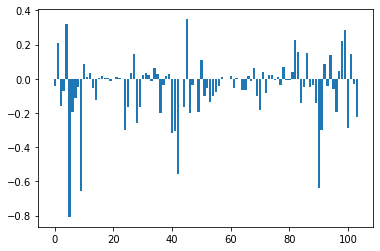

In [ ]:
Logmodel = LogisticRegression(random_state=22, class_weight="balanced", n_jobs=-1)
Logmodel.fit(X_train, Y_survive_train)
importance = Logmodel.coef_[0]
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
np.where(abs(importance)>0.15)

(array([  1,   2,   4,   5,   6,   9,  24,  25,  28,  29,  36,  40,  41,
         42,  44,  45,  46,  49,  70,  82,  83,  86,  90,  91,  96,  98,
         99, 100, 103]),)

In [ ]:
X_train_rid = X_train.iloc[:, [1,   2,   4,   5,   6,   9,  24,  25,  28,  29,  36,  40,  41,
         42,  44,  45,  46,  49,  70,  82,  83,  86,  90,  91,  96,  98,
         99, 100, 103]]

In [ ]:
X_test_rid = X_test.iloc[:, [1,   2,   4,   5,   6,   9,  24,  25,  28,  29,  36,  40,  41,
         42,  44,  45,  46,  49,  70,  82,  83,  86,  90,  91,  96,  98,
         99, 100, 103]]

In [ ]:
class_log=LogisticRegression(random_state=22, max_iter= 200,solver="liblinear", class_weight="balanced")
param = dict(C=[1,2,3,4], penalty=["l1", "l2"])
grid = GridSearchCV(class_log, param, cv=5)
grid.fit(X_train_rid, Y_survive_train.values.ravel())
print(grid.best_params_)

{'C': 3, 'penalty': 'l1'}


In [ ]:
class_log=LogisticRegression(C=3,max_iter=200, solver="liblinear", penalty="l1", random_state=22, class_weight="balanced")

In [ ]:
class_log.fit(X_train_rid, Y_survive_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(C=3, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=22, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred = class_log.predict(X_test_rid)
yhat_train= class_log.predict(X_train_rid)

In [ ]:
print(classification_report(Y_survive_train, yhat_train))

              precision    recall  f1-score   support

           0       0.29      0.80      0.43        82
           1       0.98      0.80      0.88       784

    accuracy                           0.80       866
   macro avg       0.63      0.80      0.65       866
weighted avg       0.91      0.80      0.83       866



In [ ]:
print(classification_report(Y_survive_test, pred))

              precision    recall  f1-score   support

           0       0.31      0.68      0.43        41
           1       0.95      0.82      0.88       331

    accuracy                           0.80       372
   macro avg       0.63      0.75      0.66       372
weighted avg       0.88      0.80      0.83       372



In [ ]:
pred_proba_test = class_log.predict_proba(X_test_rid)

In [ ]:
pred_proba_train = class_log.predict_proba(X_train_rid)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



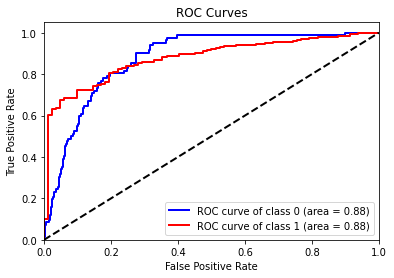

In [ ]:
skplt.metrics.plot_roc_curve(Y_survive_train, pred_proba_train, curves="each_class", cmap="brg")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



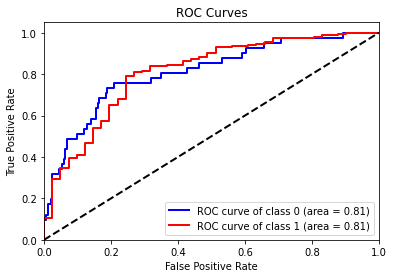

In [ ]:
skplt.metrics.plot_roc_curve(Y_survive_test, pred_proba_test, curves="each_class", cmap="brg")
plt.show()

## SVM con SURVIVE

### SVM con tutte le variabili

In [ ]:
parameters = {'kernel':('linear', 'rbf',"poly","sigmoid"), 'C':range(1, 10)}
svc = svm.SVC(random_state=22, class_weight="balanced")
grid_svm= GridSearchCV(svc, parameters,cv=5)
grid_svm.fit(X_train, Y_survive_train.values.ravel())
print(grid_svm.best_params_)

{'C': 2, 'kernel': 'linear'}


In [ ]:
Support_class= svm.SVC(C=2,kernel="linear",random_state=22, class_weight="balanced")
Support_class.fit(X_train, Y_survive_train.values.ravel())

SVC(C=2, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=22, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred1= Support_class.predict(X_train)
print(classification_report(Y_survive_train,y_pred1))

              precision    recall  f1-score   support

           0       0.36      0.96      0.52        82
           1       1.00      0.82      0.90       784

    accuracy                           0.83       866
   macro avg       0.68      0.89      0.71       866
weighted avg       0.93      0.83      0.86       866



In [ ]:
y_pred2= Support_class.predict(X_test)
print(classification_report(Y_survive_test, y_pred2))

              precision    recall  f1-score   support

           0       0.29      0.73      0.42        41
           1       0.96      0.78      0.86       331

    accuracy                           0.78       372
   macro avg       0.63      0.76      0.64       372
weighted avg       0.89      0.78      0.81       372



### SVM con feature selection

In [ ]:
fs = SelectKBest(score_func = mutual_info_classif)
fs.fit(X_train, Y_survive_train)
for i in range(len(fs.scores_)):
  print("Feature %d: %f" % (i, fs.scores_[i]))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Feature 0: 0.016941
Feature 1: 0.003623
Feature 2: 0.000000
Feature 3: 0.019360
Feature 4: 0.000000
Feature 5: 0.039609
Feature 6: 0.018315
Feature 7: 0.000000
Feature 8: 0.010310
Feature 9: 0.000000
Feature 10: 0.000000
Feature 11: 0.000608
Feature 12: 0.029083
Feature 13: 0.000000
Feature 14: 0.005678
Feature 15: 0.000000
Feature 16: 0.000000
Feature 17: 0.000000
Feature 18: 0.000000
Feature 19: 0.000000
Feature 20: 0.000000
Feature 21: 0.000000
Feature 22: 0.000000
Feature 23: 0.003314
Feature 24: 0.009900
Feature 25: 0.000000
Feature 26: 0.002522
Feature 27: 0.006896
Feature 28: 0.000000
Feature 29: 0.000000
Feature 30: 0.002784
Feature 31: 0.001663
Feature 32: 0.024681
Feature 33: 0.016533
Feature 34: 0.000000
Feature 35: 0.000000
Feature 36: 0.006692
Feature 37: 0.000000
Feature 38: 0.000000
Feature 39: 0.002454
Feature 40: 0.023251
Feature 41: 0.003127
Feature 42: 0.000000
Feature 43: 0.014620
Feature 44: 0.000000
Feature 45: 0.019837
Feature 46: 0.013987
Feature 47: 0.005002
Fe

In [ ]:
np.where(fs.scores_>0.010)

In [ ]:
X_train_rid = X_train.iloc[:, [ 0,   2,   3,  23,  32,  33,  44,  45,  56,  72,  81,  84,  89,
         90, 100, 101, 102]]

In [ ]:
X_test_rid = X_test.iloc[:, [ 0,   2,   3,  23,  32,  33,  44,  45,  56,  72,  81,  84,  89,
         90, 100, 101, 102]]

In [ ]:
parameters = {'kernel':('linear', 'rbf',"poly","sigmoid"), 'C':range(1, 10)}
svc = svm.SVC(random_state=22, class_weight="balanced")
grid_svm= GridSearchCV(svc, parameters,cv=5)
grid_svm.fit(X_train_rid, Y_survive_train.values.ravel())
print(grid_svm.best_params_)

In [ ]:
Support_class= svm.SVC(C=1,kernel="sigmoid",random_state=22, class_weight="balanced")
Support_class.fit(X_train_rid, Y_survive_train.values.ravel())

SVC(C=1, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=22, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred1= Support_class.predict(X_train_rid)
print(classification_report(Y_survive_train,y_pred1))

              precision    recall  f1-score   support

           0       0.21      0.45      0.29        82
           1       0.93      0.82      0.88       784

    accuracy                           0.79       866
   macro avg       0.57      0.64      0.58       866
weighted avg       0.87      0.79      0.82       866



In [ ]:
y_pred2= Support_class.predict(X_test_rid)
print(classification_report(Y_survive_test, y_pred2))

              precision    recall  f1-score   support

           0       0.19      0.37      0.25        41
           1       0.91      0.80      0.85       331

    accuracy                           0.76       372
   macro avg       0.55      0.58      0.55       372
weighted avg       0.83      0.76      0.79       372



# Deep Learning con SURVIVE

In [ ]:
X_train, X_test, Survive_train, Survive_test = train_test_split(X, Survive, test_size=0.3, random_state= 22)

In [ ]:
npYtrain=np.asarray(Survive_train).astype('float32')
npXtrain=np.asarray(X_train).astype('float32')

In [ ]:
npYtest=np.asarray(Survive_test).astype('float32')
npXtest=np.asarray(X_test).astype('float32')

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=104, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(npXtrain, npYtrain , epochs=500, batch_size=22)

Epoch 1/500
40/40 [==============================] - 1s 2ms/step - loss: 0.5280 - accuracy: 0.7617
Epoch 2/500
40/40 [==============================] - 0s 2ms/step - loss: 0.3330 - accuracy: 0.9000
Epoch 3/500
40/40 [==============================] - 0s 2ms/step - loss: 0.3070 - accuracy: 0.9093
Epoch 4/500
40/40 [==============================] - 0s 2ms/step - loss: 0.2669 - accuracy: 0.9274
Epoch 5/500
40/40 [==============================] - 0s 2ms/step - loss: 0.2903 - accuracy: 0.9147
Epoch 6/500
40/40 [==============================] - 0s 2ms/step - loss: 0.2910 - accuracy: 0.9144
Epoch 7/500
40/40 [==============================] - 0s 2ms/step - loss: 0.2919 - accuracy: 0.9118
Epoch 8/500
40/40 [==============================] - 0s 2ms/step - loss: 0.3177 - accuracy: 0.8996
Epoch 9/500
40/40 [==============================] - 0s 2ms/step - loss: 0.2696 - accuracy: 0.9230
Epoch 10/500
40/40 [==============================] - 0s 2ms/step - loss: 0.2824 - accuracy: 0.9140
Epoch 11/

In [ ]:
_, accuracy = model.evaluate(npXtrain, npYtrain)
print('Accuracy: %.2f' % (accuracy*100))

28/28 [==============================] - 0s 1ms/step - loss: 0.0491 - accuracy: 0.9815
Accuracy: 98.15


In [ ]:
_, accuracy = model.evaluate(npXtest, npYtest)
print('Accuracy: %.2f' % (accuracy*100))

12/12 [==============================] - 0s 1ms/step - loss: 0.3307 - accuracy: 0.8844
Accuracy: 88.44


In [ ]:
pred_train=pd.DataFrame(model.predict(npXtrain))
preds_train=round(pred_train)
preds_train.value_counts()

1.0    794
0.0     72
dtype: int64

In [ ]:
pred_test=pd.DataFrame(model.predict(npXtest))
preds_test=round(pred_test)
preds_test.value_counts()

1.0    346
0.0     26
dtype: int64

In [ ]:
print(confusion_matrix(npYtrain,preds_train))

[[ 69  13]
 [  3 781]]


In [ ]:
print(confusion_matrix(npYtest,preds_test))

[[ 12  29]
 [ 14 317]]


In [ ]:
print(classification_report(npYtrain,preds_train))

              precision    recall  f1-score   support

         0.0       0.96      0.84      0.90        82
         1.0       0.98      1.00      0.99       784

    accuracy                           0.98       866
   macro avg       0.97      0.92      0.94       866
weighted avg       0.98      0.98      0.98       866



In [ ]:
print(classification_report(npYtest,preds_test))

              precision    recall  f1-score   support

         0.0       0.46      0.29      0.36        41
         1.0       0.92      0.96      0.94       331

    accuracy                           0.88       372
   macro avg       0.69      0.63      0.65       372
weighted avg       0.87      0.88      0.87       372

